In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=6, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 대칭행렬의 대각화와 특잇값 분해
# Symmetric matrix Diagonalization and Singular Value Decomposition

학부 수준 선형대수 강의의 마지막 과정으로 특잇값 분해<sup>Singular Value Decomposition, 이하 SVD</sup>를 많이 다루게 된다. 선형대수에 나오는 약간 고급 개념을 이용하기 때문에 거의 마지막 과정으로 다루게 되는데 설명 과정중에 필연적으로 나오게 되는 대칭행렬의 대각화에 대한 내용을 잘 찾아볼 수 없어서 여러 문서를 참고하여 정리를 해보았다.

선형대수에서 많이 햇갈리는 용어와 개념들을 먼저 간단히 정리하고 대칭행렬의 대각화에 대해 이야기한다.
아울러 SVD의 유도와 관련된 몇가지 내용을 정리하였다.

다루는 내용은 다음과 같다.

- 행렬의 행공간, 열공간, 핵(Ker), 상(Im) 용어 정리
- 조르당 표준형, 일반화 고유벡터
- 대칭행렬의 대각화 여부
- 특잇값 분해 유도
- 의사역행렬(pseudo inverse)과의 관계

## 용어정리

### 열공간Column Space, $\text{Col} \mathbf{A}$

 $m \times n$ 행렬 $\mathbf{A}$의 열벡터들의 선형조합으로 만들어지는 생성공간<sup>span</sup>. 따라서 열공간은 $\mathbb{R}^m$의 부분공간이되며 차원은 선형독립인 열의 수와 같다.
 
### 행공간Row Space, $\text{Row} \mathbf{A}=\text{Col}\mathbf{A}^{\text{T}}$

 $m \times n$ 행렬 $\mathbf{A}$의 행벡터들의 선형조합으로 만들어지는 생성공간. 따라서 행공간은 $\mathbb{R}^n$의 부분공간이되며 차원은 선형독립인 행의 수와 같다. 행공간과 열공간의 차원은 같고 이는 곧 행렬 $\mathbf{A}$의 랭크<sup>rank</sup>가 된다.
 
### 핵, $\text{Ker}\mathbf{A}$<sup>[히라오카]</sup>

 $m \times n$ 행렬 $\mathbf{A}$로 제차 연립방정식을 구성했을 때 해 벡터들이 이루는 공간으로 해공간 또는 영공간<sup>null space</sup>이라고도 하고 $\mathbb{R}^n$의 부분공간이다. 이 영공간의 차원을 퇴화차수<sup>nullity</sup>라 하고 $\text{dim Ker}\mathbf{A}=\text{nullity}$이다. $\text{dim}$은 벡터공간의 차원을 의미한다.
 
### 상, $\text{Im}\mathbf{A}$<sup>[히라오카]</sup>

 $m \times n$ 행렬 $\mathbf{A}$에 $n$차원 벡터를 곱해 $m$차원 벡터로 변환할 때 결과 벡터가 이루는 공간을 의미한다. 행렬에 벡터를 곱해서 나오는 결과 벡터는 행렬의 열벡터를 선형조합하여 나온 결과 이므로 $\text{Im}\mathbf{A}$의 차수는 $\mathbf{A}$의 선형독립인 열 갯수와 같다. 이는 곧 $\text{dim Im}\mathbf{A}=\text{rank}(\mathbf{A})$임을 의미 한다.

위 두 개념을 적용하여 다음과 같은 정리가 가능하다.

#### 랭크정리(차원정리)

$m \times n$ 행렬 $\mathbf{A}$에 대해 

$$
n = \text{rank} + \text{nullity} = \text{dim Im}\mathbf{A} + \text{dim Ker}\mathbf{A}
$$

아래와 같이 계수 행렬이 $m \times n$인 제차 선형 연립방정식에서 $\mathbf{0}$ 벡터 이외의 해를 가진다고 하자.
그러면 존재하는 해 벡터 $\mathbf{x}$는 행렬 $\mathbf{A}$의 모든 행과 내적해서 0이 되는 벡터들이다. 행렬 $\mathbf{A}$의 행벡터와 해 벡터 $\mathbf{x}$는 $n \times 1$ 벡터이므로 $\mathbb{R}^n$에 속한다. 

$$
\mathbf{Ax}=
\begin{bmatrix}
- & \mathbf{a}_1 & - \\
- & \mathbf{a}_2 & - \\
  & \vdots       &   \\
- & \mathbf{a}_m & - 
\end{bmatrix}
\begin{bmatrix}
| \\ 
\mathbf{x} \\
|
\end{bmatrix}=
\mathbf{0}
$$

$\mathbf{A}$의 랭크가 $r$이라면 $\mathbb{R}^n$의 기저중 $r$개는 이미 행렬 $\mathbf{A}$의 행벡터들로 주어졌다. 해 벡터 $\mathbf{x}$는 이 $r$개의 기저들과 모두 수직(내적이 0)하는 벡터들이므로 $\mathbf{x}$는 $\mathbb{R}^n$의 나머지 $n-r$개의 기저가 된다. 따라서 해 벡터들이 이루는 영공간의 차원은 $n-r$이고 "영공간의 차원 + 계수행렬의 랭크 = 열 개수"가 성립한다. 

## 닮은 행렬

어떤 $n \times n$ 행렬 $\mathbf{A}$ 앞뒤로 어떤 $n \times n$ 정칙행렬 $\mathbf{P}$를 곱해서 나오는 행렬 $\mathbf{\hat{A}}$은 $\mathbf{A}$ 와 닮음이라고 하고 이를 닮음 변환<sup>similarity transformation</sup>이라 한다. 즉, 다음과 같다.

$$
\mathbf{\hat{A}} = \mathbf{P}^{-1} \mathbf{A} \mathbf{P}
$$

이 닮음 변환에 여러 성질이 있지만 여기서 관심있는 것은 다음 성질이다.

###  닮은 행렬의 랭크

$$
\text{rank} \left(\mathbf{P}^{-1} \mathbf{A} \mathbf{P} \right) = \text{rank}(\mathbf{A})
$$

위 성질을 보이기 위해 다음 두 성질을 보여야 한다.<sup>[히라오카]</sup> $\mathbf{P}$, $\mathbf{Q}$가 정칙행렬 일 때

$$
\text{rank}(\mathbf{AQ}) = \text{rank}(\mathbf{A}) \\[5pt]
\text{rank}(\mathbf{PA}) = \text{rank}(\mathbf{A})
$$

####  $\text{rank}(\mathbf{AQ}) = \text{rank}(\mathbf{A})$

$\text{dim Im}(\mathbf{A})=\text{rank}(\mathbf{A})$이므로 $\text{Im}(\mathbf{AQ}) = \text{Im}(\mathbf{A})$을 보이면 $\text{dim Im}(\mathbf{AQ}) = \text{dim Im}(\mathbf{A}) \implies \text{rank}(\mathbf{AQ}) = \text{rank}(\mathbf{A})$임을 보일 수 있게 된다. $\text{Im}(\mathbf{A})$에 속하는 임의의 $\mathbf{y}$에 대해 생각하자. $\mathbf{y} \in \text{Im}(\mathbf{A})$라는 말은 $\mathbf{y}$에 대해 

$$\mathbf{y} = \mathbf{Ax} \tag{1}$$

를 만족시키는 $\mathbf{x}$가 존재한다는 말이다. $\mathbf{Q}$는 정칙행렬이므로 $\mathbf{Q}^{-1}$가 존재하고 이를 $\mathbf{x}$에 곱하면 $\mathbf{x}' = \mathbf{Q}^{-1} \mathbf{x}$인 $\mathbf{x}'$가 존재한다. 양변에 $\mathbf{Q}$를 곱하면 $\mathbf{x} = \mathbf{Q} \mathbf{x}'$가 되고 이를 (1)에 대입하면

$$
\mathbf{y} = \mathbf{Ax} = \mathbf{A Q x}'
$$

가 된다. 최초 $\mathbf{y} \in \text{Im}(\mathbf{A})$이었고 위 식은 이 벡터 $\mathbf{y}$가 $\text{Im}(\mathbf{AQ})$에도 속한다는 것을 보여주고 있다. 이상으로 $\mathbf{Q}$가 정칙이면 임의의 $\mathbf{y}$에 대해

$$
\mathbf{y} \in \text{Im}(\mathbf{A}) \implies \mathbf{y} \in \text{Im}(\mathbf{AQ})
$$

임을 보였다.

이제 반대로 $\text{Im}(\mathbf{AQ})$에 속하는 임의의 $\mathbf{z}$에 대해 생각하자. 이말은 

$$\mathbf{z} = \mathbf{AQ} \mathbf{x} \tag{2}$$

을 만족하는 $\mathbf{x}$가 존재한다는 말이 된다. 위와 같은 논리로 $\mathbf{x}= \mathbf{Q}^{-1}\mathbf{x}'$로 $\mathbf{x}$를 만들어내는 $\mathbf{x}'$가 존재한다.$\mathbf{x}= \mathbf{Q}^{-1}\mathbf{x}'$를 식(2)에 대입하면

$$
\mathbf{z} = \mathbf{AQx} = \mathbf{AQ} \left(\mathbf{Q}^{-1}\mathbf{x}' \right) = \mathbf{A}\mathbf{x}'
$$

위 식은 $\text{Im}(\mathbf{AQ})$에 속하는 $\mathbf{z}$는 $\text{Im}(\mathbf{A})$에도 속한다는 것을 보여준다. 따라서 $\mathbf{Q}$가 정칙이면 임의의 $\mathbf{z}$에 대해

$$
\mathbf{z} \in \text{Im}(\mathbf{AQ}) \implies \mathbf{z} \in \text{Im}(\mathbf{A})
$$

두 결과

$$
\mathbf{y} \in \text{Im}(\mathbf{A}) \implies \mathbf{y} \in \text{Im}(\mathbf{AQ}) \\[5pt]
\mathbf{z} \in \text{Im}(\mathbf{AQ}) \implies \mathbf{z} \in \text{Im}(\mathbf{A})
$$

를 종합하면 $\text{Im}(\mathbf{AQ})=\text{Im}(\mathbf{A})$ 임을 알 수 있고 이는 곧 $\text{rank}(\mathbf{AQ}) = \text{rank}(\mathbf{A})$임을 의미한다.

#### $\text{rank}(\mathbf{PA}) = \text{rank}(\mathbf{A})$


$\text{rank}(\mathbf{A})=r$이면  $\mathbf{A}$의 독립인 $r$개의 열벡터 $\mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_r$은 $\text{Im}(\mathbf{A})$의 기저이다. 따라서 $\mathbf{u}_i \in \text{Im}(\mathbf{A})$인데 앞선 방식과 마찬가지로 이는 $\mathbf{u}_i = \mathbf{A} \mathbf{x}$가 되는 $\mathbf{x}$가 존재한다는 뜻이다. 한편 $\mathbf{u}_i $에 행렬 $\mathbf{P}$를 곱해서 얻게 되는 벡터를 $\mathbf{u}'_i$로 두자. 

$$
\mathbf{u}'_i = \mathbf{Pu}_i \tag{3}
$$

$\mathbf{u}_i = \mathbf{A} \mathbf{x}$를 식(3)에 대입하면

$$
\mathbf{u}'_i = \mathbf{P}\mathbf{A}\mathbf{x}
$$

이므로 이는 곧 $\mathbf{u}'_i \in \text{Im}(\mathbf{PA})$를 의미한다. 이제 $\text{Im}(\mathbf{PA})$에 속하는 임의의 어떤 벡터 $\mathbf{y}'$를 생각하자. 그러면 $\mathbf{y}'$에 대해 

$$\mathbf{y}' = \mathbf{PAx} \tag{4}$$

를 만족하는 $\mathbf{x}$가 존재한다는 의미이고 식(4)의 양변에 $\mathbf{P}^{-1}$를 곱하면 $\mathbf{P}^{-1} \mathbf{y}' = \mathbf{Ax}$가 되어 $\mathbf{P}^{-1}\mathbf{y}' \in \text{Im}(\mathbf{A})$임을 알 수 있다. 다시말해 어떤 $\mathbf{y}'$가 $\text{Im}(\mathbf{PA})$에 속하면 $\mathbf{P}^{-1}\mathbf{y}'$는 $\text{Im}(\mathbf{A})$에 속하게 된다. 이 $\mathbf{P}^{-1}\mathbf{y}'$를 $\mathbf{y}$로 두자. 

$$
\mathbf{y} = \mathbf{P}^{-1}\mathbf{y}' \tag{5}
$$

$\mathbf{y} \in \text{Im}(\mathbf{A})$이므로 

$$
\mathbf{y} = c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2 + \cdots + c_r \mathbf{u}_{r}
$$

로 쓸 수 있고 양변에 $\mathbf{P}$를 곱하면

$$
\begin{align}
\mathbf{P}\mathbf{y} &= c_1 \mathbf{P}\mathbf{u}_1 + c_2 \mathbf{P}\mathbf{u}_2 + \cdots + c_r \mathbf{P}\mathbf{u}_{r} \\[5pt]
\mathbf{y}' &= c_1 \mathbf{u}'_1 + c_2 \mathbf{u}'_2 + \cdots + c_r \mathbf{u}'_{r} \quad \because \text{eq. (3),(5)}
\end{align}
$$

여기서 보이고 싶은것은 $\mathbf{y}' \in \text{Im}(\mathbf{PA})$이므로 $\mathbf{y}'$를 선형조합으로 표현한 $\mathbf{u}'_1, \mathbf{u}'_2, \dots, \mathbf{u}'_r$들이 $\text{Im}(\mathbf{PA})$의 기저인가 하는 것이다.

$\mathbf{u}'_1, \mathbf{u}'_2, \dots, \mathbf{u}'_r$들이 $\text{Im}(\mathbf{PA})$의 기저가 아니라고 하자. 즉, 기저를 넘어 쓸데없는 여분의 벡터가 표함되어 있다 하자. (기저보다 부족한 경우는 임의의 $\mathbf{y}'$를 표현하지 못하므로 생각할 필요없음) 그렇다면 다음처럼 또 다른 선형조합이 존재한다.

$$
\mathbf{y}' = c_1 \mathbf{u}'_1 + c_2 \mathbf{u}'_2 + \cdots + c_r \mathbf{u}'_{r} = d_1 \mathbf{u}'_1 + d_2 \mathbf{u}'_2 + \cdots + d_r \mathbf{u}'_{r} \tag{6}
$$

식(6) 양변에 $\mathbf{P}^{-1}$를 곱하면

$$
\mathbf{y} = c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2 + \cdots + c_r \mathbf{u}_{r} = d_1 \mathbf{u}_1 + d_2 \mathbf{u}_2 + \cdots + d_r \mathbf{u}_{r} \tag{7}
$$

가 된다. $\mathbf{y}$는 $\text{Im}(\mathbf{A})$에 속하고 $\mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_r$은 $\text{Im}(\mathbf{A})$의 기저임이 분명한데 식(7)처럼 두가지 선형조합이 있다는 것은 모순이다. 따라서 $\mathbf{u}'_1, \mathbf{u}'_2, \dots, \mathbf{u}'_r$들이 $\text{Im}(\mathbf{PA})$의 기저가 아니라는 가정은 틀린것이며 $\mathbf{u}'_1, \mathbf{u}'_2, \dots, \mathbf{u}'_r$들은 $\text{Im}(\mathbf{PA})$의 기저가 된다. 따라서 $\text{Im}(\mathbf{PA})$과 $\text{Im}(\mathbf{A})$의 기저 갯수는 같다는 결론을 내릴 수 있으며 다음과 같다.

$$
\text{dim Im}(\mathbf{PA}) = \text{dim Im}(\mathbf{A})  \implies \text{rank}(\mathbf{PA}) = \text{rank}(\mathbf{A}) 
$$

위 두 명제가 참이므로 닮은 행렬의 랭크는 다음과 같음을 알 수 있다.

$$
\text{rank}\left(\hat{\mathbf{A}}\right) = \text{rank}\left(\mathbf{P}^{-1} \mathbf{A} \mathbf{P}\right) = \text{rank}(\mathbf{A}) \tag{8}
$$

## 대각화

닮음 변환 $\mathbf{\hat{A}} = \mathbf{P}^{-1} \mathbf{A} \mathbf{P}$에서 $\mathbf{\hat{A}}$가 대각행렬이 되는 경우를 대각화라 한다. 이렇게 대각행렬을 만들 수 있는 조건은 $\mathbf{A}$의 고유벡터들이 모두 선형독립이고 $\mathbf{P}$는 이 고유벡터를 열로 가지는 행렬이 되는 것이다. 고유벡터의 선형독립성에 대해서 다음 정리가 증명되어 있다.

> $n \times n$정사각행렬의 고유치가 모두 서로 다르면 그에 해당하는 고유벡터들은 서로 독립이 되어 $\mathbb{R}^n$의 기저가 된다.<sup>[kreyzig:8.4]</sup>

위 정리의 증명은 [kreyzig:8.4]에 자세히 나와 있다. 고유벡터가 모두 선형독립이라는 가정하에 대각화 정리가 참인지 알아보자. 이 방법은 대칭행렬의 대각화를 보이기 위한 일반화 고유벡터의 유도와 SVD의 유도에서도 그대로 사용되므로 자세히 알아둘 필요가 있다.

$$
\mathbf{D} = \mathbf{P}^{-1} \mathbf{A} \mathbf{P}
$$

$n \times n$행렬 $\mathbf{A}$가 어떤 $\mathbf{P}$에 의해 위처럼 대각화 되었을 때 양변에 $\mathbf{P}$를 곱하면 

$$
\mathbf{P}\mathbf{D} =  \mathbf{A} \mathbf{P}
$$

행렬 $\mathbf{P}$를 열벡터 형태로 다시 쓰면 다음과 같다.

$$
\mathbf{A} \begin{bmatrix} \mathbf{p}_1 & \mathbf{p}_2 & \cdots & \mathbf{p}_n \end{bmatrix} = 
\begin{bmatrix} \mathbf{p}_1 & \mathbf{p}_2 & \cdots & \mathbf{p}_n \end{bmatrix}
\begin{bmatrix} \lambda_1 & 0 & \cdots & 0 \\ 0 & \lambda_2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_n \end{bmatrix}
$$

행렬 곱을 앞 행렬의 열들을 뒤 행렬의 열의 숫자를 계수로한 선형조합으로 보고 위식을 다시 적으면 다음과 같다.  

$$
\begin{bmatrix} \mathbf{A} \mathbf{p}_1 & \mathbf{A} \mathbf{p}_2 & \cdots & \mathbf{A} \mathbf{p}_n \end{bmatrix}=
\begin{bmatrix} \lambda_1 \mathbf{p}_1 & \lambda_2 \mathbf{p}_2 & \cdots & \lambda_n \mathbf{p}_n \end{bmatrix}
$$

위 식은 $n$개의  $\mathbf{A} \mathbf{p}_i  = \lambda_i \mathbf{p}_i$를 의미하고 이는 $\mathbf{p}_i$, $\lambda_i$가 $\mathbf{A}$의 고유벡터와 고유값임을 의미한다. 마지막으로 $\mathbf{P}$의 역행렬이 존재했어야 했는데 이를 위해서는 $\mathbf{p}_i$가 모두 선형독립이면 된다. 이것은 바로 가정과 일치하므로 $\mathbf{P}$는 역행렬이 존재한다. 

결국 $\mathbf{P}$를 선형독립인 고유벡터로 구성하면 행렬 $\mathbf{A}$가 고유값으로 구성된 대각행렬 $\mathbf{D}$로 대각화 됨을 보였다.

### 대각화를 이용한 고유분해

대각화식 양변에 $\mathbf{P}$와 $\mathbf{P}^{-1}$를 곱하면

$$
\begin{align}
&\mathbf{P}^{-1} \mathbf{A} \mathbf{P} = \mathbf{D} \\[5pt]
&\mathbf{P}\mathbf{P}^{-1} \mathbf{A} \mathbf{P}\mathbf{P}^{-1} = \mathbf{P}\mathbf{D}\mathbf{P}^{-1} \\[5pt]
&\mathbf{A} = \mathbf{P}\mathbf{D}\mathbf{P}^{-1} 
\end{align}
$$

행렬 $\mathbf{A}$는 고유벡터와 고유값들로 이루어진 행렬로 분해가 되고 이를 고유분해라 한다. 고유분해 가능함은 대각화 가능함으로 이야기 할 수 있다. 모든 행렬이 대각화 가능하지 않기 때문에 고유분해 역시 모든 행렬에서 가능하지 않다. 하지만 SVD는 어떤 행렬이라도 가능하다.

### 대칭행렬의 대각화 

 앞서 대각화를 위해서 고유벡터가 모두 선형독립이어야 함을 이야기 했다. 이를 위해 일반적으로는 고유값이 모두 서로 다르면 된다. 흥미로운 사실은 대칭행렬에서는 고유값이 모두 서로 다르지 않더라도 고유벡터가 모두 선형독립이 된다는 사실이다. 즉, 다음과 같다.

>대칭행렬은 고유벡터로 구성된 정규 직교기저를 갖는다.<sup>[kreyzig:8.4]</sup>

아래는 간단한 실험이다.

In [2]:
np.set_printoptions(suppress=True)

S = np.array([10,   17,   10,   30,
              17,   41,   28,   51,
              10,   28,   20,   30,
              30,   51,   30,   90]).reshape(4,4)

print("Rank(S) : {}".format(np.linalg.matrix_rank(S)))
lamdas, P = np.linalg.eig(S)
print("Eigenvalues of S : {}".format(lamdas))
print("P, eigenvectors of S")
print(P)
print("Rank(P) : {}".format(np.linalg.matrix_rank(P)))
print()

Rank(S) : 2
Eigenvalues of S : [145.571115   0.        15.428885   0.      ]
P, eigenvectors of S
[[ 0.255291  0.949528  0.182273  0.636191]
 [ 0.49927  -0.028134 -0.552715 -0.513753]
 [ 0.314632  0.030948 -0.60189   0.565128]
 [ 0.765874 -0.310882  0.54682  -0.109313]]
Rank(P) : 4



행렬 $\mathbf{S}$의 랭크는 2이고 고유값 4개중 2개가 0으로 모두 서로 다르지 않지만 그에 대응되는 고유벡터로 이루어진 행렬 $\mathbf{P}$의 랭크가 4로 이 고유벡터들은 모두 독립이며 $\mathbb{R}^4$의 기저를 이루는 것을 확인할 수 있다.<sup>1)</sup> 또 주어진 대칭행렬 $\mathbf{S}$의 랭크는 0이 아닌 고유값 갯수와 일치하는것도 확인할 수 있다.

따라서 위 대칭행렬은 대각화 가능하다. $\mathbf{P}^{-1} \mathbf{S} \mathbf{P}$로 확인해보면 대각행렬이 얻어진다.
<hr/>
<div class="comment">
<sup>1)</sup> 눈여겨 봐야할 점은 고유값 0에 대해서 구해진 두 벡터 $\mathbf{p}_2$, $\mathbf{p}_4$는 서로 직교가 아니라는 점이다. 아직 선형독립일 뿐이고 직교화 하려면 그람-슈미트 정규직교화 과정<sup>[그람-슈미트:wiki]</sup>을 거쳐야 한다. 참고로 `octave`에서 구한 고유벡터를 열로가지는 행렬은 직교화를 한 상태로 구해진다.
</div>
```octave
v =
   0.920848  -0.231607  -0.182273   0.255291
   0.135327   0.653393   0.552715   0.499270
  -0.148860  -0.718732   0.601890   0.314632
  -0.334015  -0.053476  -0.546820   0.765874
```


In [3]:
print("P^{-1}*S*P")
print(np.dot(np.dot(np.linalg.inv(P),S),P))

P^{-1}*S*P
[[145.571115   0.        -0.         0.      ]
 [ -0.        -0.         0.        -0.      ]
 [ -0.         0.        15.428885   0.      ]
 [ -0.        -0.        -0.         0.      ]]


대칭행렬의 대각화를 실험적으로 확인했는데 어떤 대칭행렬이더라도 이런 성질이 성립한다는 것이 중요하다. 이를 보이기 위해 새로운 개념인 조르당 표준형과 일반화 교유벡터를 간단하게 알아보기로 한다.

#### 조르당 표준형Jordan Canonical Form

임의의 정사각행렬을 대각화까지는 못하더라도 대각행렬과 비슷한 형태로는 항상 만들수 있다.<sup>[히라오카]</sup> 그 비슷한 형태를 조르당 표준형이라고 하는데 다음과 같은 모양이다.

$$
\left[
\begin{array}{ccc|cc|c|c|cc}
\lambda_1 & 1         &           &           &           &   &   &   & \\
          & \lambda_1 & 1         &           &           &   &   &   & \\
          &           & \lambda_1 &           &           &   &   &   & \\ \hline
          &           &           & \lambda_2 & 1         &   &   &   & \\
          &           &           &           & \lambda_2 &   &   &   & \\ \hline
          &           &           &           &           & \lambda_3  &   &   & \\ \hline         
          &           &           &           &           &   & \ddots  &   & \\  \hline 
          &           &           &           &           &   &   & \lambda_n  & 1 \\    
          &           &           &           &           &   &   &  & \lambda_n           
\end{array}
\right]
$$

행렬의 고유값이 대각 성분으로 늘어서고 고유값의 오른쪽 자리에 1이 오는 행렬이다. 어떤 임의의 정사각행렬 앞뒤로 어떤 정칙행렬 $\mathbf{P}$를 곱해 항상 이런 형태로 만들 수 있다. 위 형태에서 고유값으로 구성된 부분 행렬을 조르당 셀 또는 조르당 블록이라고 한다. 고유값이 중근이 아닌 경우는 오른쪽 자리에 1이 오지 않는다. $\lambda_3$같은 경우이다. 이 경우 조르당 블록은 크기가 1인 블록이 된다. 예로 든 행렬의 경우 $\lambda_1$은 3중근, $\lambda_2$는 2중근, $\lambda_3$은 중근이 아니고 $\lambda_n$은 2중근이다. 이를 일반화시켜서 생각하면 대각행렬도 조르당 표준형의 일종이 된다. 즉 모든 고유값이 서로 다르면 다음과 같고 이는 곧 대각행렬임을 알 수 있다.

$$
\left[
\begin{array}{c|c|c|c|c}
\lambda_1 & & & & \\ \hline      
 &\lambda_2 & & & \\  \hline           
 & & \lambda_3 & & \\ \hline        
 & & & \ddots & \\ \hline        
 & &  & & \lambda_n \\ 
\end{array}
\right]
$$

조르당 표준형의 예를 들면 다음과 같은 모양을 들 수 있겠다.

$$
\mathbf{J} = \begin{bmatrix}
\color{Royalblue}{5} & \color{Royalblue}{1} & \color{Royalblue}{0} & 0 & 0 & 0 & 0 \\
\color{Royalblue}{0} & \color{Royalblue}{5} & \color{Royalblue}{1} & 0 & 0 & 0 & 0 \\
\color{Royalblue}{0} & \color{Royalblue}{0} & \color{Royalblue}{5} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \color{OrangeRed}{5} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \color{Green}{2} & \color{Green}{1} & 0 \\
0 & 0 & 0 & 0 & \color{Green}{0} & \color{Green}{2} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \color{red}{4}
\end{bmatrix}
$$

이 경우 5는 4중근, 2는 2중근이고 4는 중근이 아니다. 눈여겨 볼 점은 4중근 고유값 5인 경우 조르당 블록이 2개가 있는데 이 조르당 블록의 갯수가 고유값 5에 대한 선형독립인 고유벡터의 갯수가 된다. 따라서 조르당 표준형을 보면 고유값과 고유벡터의 다중도를 쉽게 파악 가능하다. 고유값 5의 경우 대수적 다중도는 4, 기하적 다중도는 2가 된다.<sup>2)<sup>
    
<hr/>

<div class="comment">
<sup>2)</sup> 특성방정식으로 고유값을 구할 때 특정 고유값이 몇중근에 해당하는지를 대수적 다중도라 한다. 그리고 그 다중 고유값에 대응하는 선형독립인 고유벡터의 개수를 기하적 다중도라고 한다. 기하적 다중도는 대수적 다중도보다 작거나 같다. 대칭행렬에서는 이 다중도가 항상 같은데 이는 아래에 추가로 설명한다.
</div>


#### 일반화 고유벡터Generalized eigenvectors

행렬의 대각화를 유도할때와 같은 방법을 사용한다.

어떤 정칙행렬 $\mathbf{P}$가 있어서 $\mathbf{P}^{-1}\mathbf{A}\mathbf{P} = \mathbf{J}$를 만족한다하자. 여기서 $\mathbf{J}$는 조르당 표준형으로 다음과 같다고 가정하자.

$$
\mathbf{J} = \begin{bmatrix}
\color{Royalblue}{5} & \color{Royalblue}{1} & \color{Royalblue}{0} & 0 & 0 & 0 & 0 \\
\color{Royalblue}{0} & \color{Royalblue}{5} & \color{Royalblue}{1} & 0 & 0 & 0 & 0 \\
\color{Royalblue}{0} & \color{Royalblue}{0} & \color{Royalblue}{5} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \color{OrangeRed}{5} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \color{Green}{2} & \color{Green}{1} & 0 \\
0 & 0 & 0 & 0 & \color{Green}{0} & \color{Green}{2} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \color{red}{4}
\end{bmatrix}
$$

양변에 $\mathbf{P}$를 곱하면 $\mathbf{A}\mathbf{P} = \mathbf{P}\mathbf{J}$이고 이를 풀어쓰면 다음과 같다.

$$
\begin{bmatrix}
\mathbf{A}\mathbf{p}_1 & \mathbf{A}\mathbf{p}_2 & \cdots & \mathbf{A}\mathbf{p}_n \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{p}_1 & \mathbf{p}_2 & \cdots & \mathbf{p}_n
\end{bmatrix}
\begin{bmatrix}
\color{Royalblue}{5} & \color{Royalblue}{1} & \color{Royalblue}{0} & 0 & 0 & 0 & 0 \\
\color{Royalblue}{0} & \color{Royalblue}{5} & \color{Royalblue}{1} & 0 & 0 & 0 & 0 \\
\color{Royalblue}{0} & \color{Royalblue}{0} & \color{Royalblue}{5} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \color{OrangeRed}{5} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \color{ForestGreen}{2} & \color{ForestGreen}{1} & 0 \\
0 & 0 & 0 & 0 & \color{ForestGreen}{0} & \color{ForestGreen}{2} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \color{Goldenrod}{4}
\end{bmatrix}
$$

위 행렬곱을 풀어서 정리하면 다음과 같다.

$$
\begin{array}{ccc} 
\color{RoyalBlue}{\mathbf{A}\mathbf{p}_1 = 5\mathbf{p}_1} & \color{Royalblue}{\implies} & \color{Royalblue}{(\mathbf{A}-5 \mathbf{I})\mathbf{p}_1 = \mathbf{0}} \\[5pt]
\color{RoyalBlue}{\mathbf{A}\mathbf{p}_2 = 1\mathbf{p}_1 + 5\mathbf{p}_2}  & \color{RoyalBlue}{\implies} &  \color{RoyalBlue}{(\mathbf{A}-5 \mathbf{I})\mathbf{p}_2 = \mathbf{p}_1} \\[5pt]
\color{RoyalBlue}{\mathbf{A}\mathbf{p}_3 = 1\mathbf{p}_2 + 5\mathbf{p}_3}  & \color{RoyalBlue}{\implies} & \color{RoyalBlue}{ (\mathbf{A}-5 \mathbf{I})\mathbf{p}_3 = \mathbf{p}_2} 
\\[5pt] \hline
\color{OrangeRed}{\mathbf{A}\mathbf{p}_4 = 5\mathbf{p}_4}  & \color{OrangeRed}{\implies} &  \color{OrangeRed}{(\mathbf{A}-5 \mathbf{I})\mathbf{p}_4 = \mathbf{0}} \\[5pt] \hline
\color{ForestGreen}{\mathbf{A}\mathbf{p}_5 = 2\mathbf{p}_5}  & \color{ForestGreen}{\implies} &  \color{ForestGreen}{(\mathbf{A}-2 \mathbf{I})\mathbf{p}_5 = \mathbf{0}} \\[5pt]
\color{ForestGreen}{\mathbf{A}\mathbf{p}_6 = 1\mathbf{p}_5 + 2\mathbf{p}_6}  & \color{ForestGreen}{\implies} & \color{ForestGreen}{ (\mathbf{A}-2 \mathbf{I})\mathbf{p}_6 = \mathbf{p}_5} \\[5pt] \hline
\color{Goldenrod}{\mathbf{A}\mathbf{p}_7 = 4\mathbf{p}_7}  & \color{Goldenrod}{\implies} & \color{Goldenrod}{(\mathbf{A}-4 \mathbf{I})\mathbf{p}_7 = \mathbf{0}}
\end{array}
$$

위 식에서 가로 선으로 구분된 각 묶음의 첫번째 줄에 해당하는 벡터 $\mathbf{p}_1$, $\mathbf{p}_4$, $\mathbf{p}_5$, $\mathbf{p}_7$은 그 자체로 이미 고유벡터이다. 만약 행렬 $\mathbf{A}$가 $\mathbf{J}$형태의 조르당 표준형으로 변환된다면 $\mathbf{A}$의 고유벡터는 4개가 있다는 이야기다. 나머지 $\mathbf{p}_2$, $\mathbf{p}_3$, $\mathbf{p}_6$은 고유벡터까지는 되지 못하는데 고유벡터가 되기 위한 $(\mathbf{A}-\lambda \mathbf{I})\mathbf{x} = \mathbf{0}$를 만족시키지 못하기 때문이다. 하지만 각 묶음의 마지막 식을 바로 위 식에 대입하는 과정으로 구해지는 다음식들은 만족한다.

$$
\color{RoyalBlue}{(\mathbf{A}- 5\mathbf{I})^2\mathbf{p}_2 = \mathbf{0}} \\[5pt]
\color{RoyalBlue}{(\mathbf{A}- 5\mathbf{I})^3\mathbf{p}_3 = \mathbf{0}} \\[5pt]
\color{ForestGreen}{(\mathbf{A}- 2\mathbf{I})^2\mathbf{p}_6 = \mathbf{0}}
$$

 이 벡터들은 $(\mathbf{A}-\lambda \mathbf{I})$를 거듭제곱 형태로 곱할때만 비로소 $\mathbf{0}$벡터가 되는 벡터들이다. 이런 형태를 만족시키는 벡터를 일반화 고유벡터<sup>Generalized eigenvector</sup>라고 한다. 이런 현상은 $\mathbf{J}$행렬의 조르당 블록에 1이 나타나서 생기는 현상이다. 만약 $\mathbf{J}$행렬에서 1인 부분이 모두 0이 되어 깨끗하게 대각화가 되었다면 $\mathbf{p}_j$벡터들은 모두 고유벡터가 된다는 사실을 확인할 수 있다. 다시말해 행렬이 대각화가 되면 다중도 2이상의 고유값에 대응하는 일반화 고유벡터는 모두 고유벡터라는 말이 된다. 
 
 이런 성질을 이용하면 간단하게 대칭행렬의 대각화 가능성을 보일 수 있다.

#### 대칭행렬의 대각화

이제 대칭행렬에 대한 대각화를 이야기할 수 있다. 즉 다음 질문에 대한 대답을 할 수 있게 된것이다.

>대칭행렬은 항상 대각화 가능한가?

##### 조르당 표준형을 이용한 방법 

이에 대한 답을 조르당 표준형과 일반화 고유벡터를 이용해서 보일 수 있다.<sup>[MAE 280A]</sup>

대칭행렬 $\mathbf{A}$가 대각화 가능하지 않다고 가정하자. 그러면 대수적 다중도 2이상의 고유값에 대해서 일반화 고유벡터를 가진다는 말이 된다. 이는 중복되는 어떤 고유값 $\lambda_i$에 대해서 다음 식을 만족하는 $\mathbf{v} \ne \mathbf{0}$인 벡터 $\mathbf{v}$가 존재한다는 말이다.

$$
(\mathbf{A}-\lambda_i \mathbf{I})^2 \mathbf{v} = \mathbf{0} \,\text{ and }\, (\mathbf{A}-\lambda_i \mathbf{I}) \mathbf{v} \ne \mathbf{0} \tag{9}
$$

앞 식 양변에 $\mathbf{v}^{\text{T}}$를 곱하고 전개를 한다.

$$
\begin{align}
\mathbf{0} = &\mathbf{v}^{\text{T}}(\mathbf{A}-\lambda_i \mathbf{I})^2 \mathbf{v} \\[5pt]
=&\mathbf{v}^{\text{T}}(\mathbf{A}-\lambda_i \mathbf{I})(\mathbf{A}-\lambda_i \mathbf{I})\mathbf{v} \\[5pt]
\ne& \mathbf{0}
\end{align} \tag{10}
$$

두번째 줄에서 가정에의해 $(\mathbf{A}-\lambda_i \mathbf{I})\mathbf{v}\ne\mathbf{0}$이고 

$$
\begin{align}
\left((\mathbf{A}-\lambda_i \mathbf{I})\mathbf{v}\right)^{\text{T}}
&=\mathbf{v}^{\text{T}}(\mathbf{A}-\lambda_i \mathbf{I})^{\text{T}} \\[5pt]
&=\mathbf{v}^{\text{T}}(\mathbf{A}-\lambda_i \mathbf{I}) \quad \because  \mathbf{A} \text{ is symmetry} \\[5pt]
&\ne \mathbf{0}
\end{align}
$$

이 되므로 $\mathbf{v}^{\text{T}}(\mathbf{A}-\lambda_i \mathbf{I})(\mathbf{A}-\lambda_i \mathbf{I})\mathbf{v} \ne \mathbf{0}$이다. 식(10)에서 모순이 발생하고 이는 대칭행렬 $\mathbf{A}$가 대각화 가능하지 않다는 가정이 틀렸다는 말이 된다. 즉, 식(9)를 만족하는 벡터, 다시말해 대수적 다중도 2이상의 고유값에 대응하는 일반화 고유벡터가 존재하지 않음을 보였고 이는 곧 $(\mathbf{A}-\lambda_i \mathbf{I}) \mathbf{v} = \mathbf{0}$를 만족하는 고유벡터가 존재한다는 말이 되어 대칭행렬은 대각화 가능하게 된다.

##### 직접보이기

조금 다른 각도에서 

>대수적 다중도 $m$인 고유값에 대응하는 $m$개의 선형독립인 고유벡터를 항상 찾을 수 있는가? 

하는 문제를 생각해보자. 이 질문에 그렇다고 대답하는 과정 역시 대칭행렬의 대각화 여부를 보이는 방법이다. 
이를 다음 방법으로 보일 수 있다.<sup>[quandt]</sup>


먼저 대수적 다중도 2인 고유값 $\lambda_i$에 대해서 생각한다. 고유값에 대한 대수적 다중도를 $m(\lambda_i) = 2$로 표기하기로 하자. 고유값은 특성방정식의 해가 있다는 가정($\text{det}(\mathbf{A}-\lambda\mathbf{I})=0$)하에서 구해지므로 구해진 고유값의 다중도가 얼마가 되든간에 대응하는 고유벡터가 적어도 하나 존재한다. 이 $n$차원 단위 벡터를 $\mathbf{x}_i$라 두자. 그러면 나머지 $n-1$개의 직교 벡터를 구할 수 있다. 이를 $\mathbf{y}_j$라 두자. $\mathbf{x}_i$는 $\lambda_i$에 대응하는 고유벡터이고 $\mathbf{y}_j$들은 고유벡터는 아니고 그냥 $\mathbf{x}_i$와 직교하는 $n-1$개의 벡터들이다. $\mathbf{y}_j$를 열로 하는 행렬을 정의한다.

$$
    \mathbf{Y} = \begin{bmatrix} \mathbf{y}_2 & \mathbf{y}_3 & \cdots & \mathbf{y}_n \end{bmatrix}
$$

$\mathbf{Y}$에 고유벡터 $\mathbf{x}_i$를 추가하여 $\mathbf{B}$행렬을 정의한다.

$$
    \mathbf{B} = \begin{bmatrix}\mathbf{x}_i & \mathbf{Y} \end{bmatrix}
$$

그러면 $\mathbf{B}$는 직교행렬이어서 $\mathbf{B}^{\text{T}}$가 역행렬이 된다. 또 $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$는 $\mathbf{A}$의 닮음행렬이 된다. $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$를 구체적으로 풀어 적어보면 다음과 같다.

$$
\begin{align}
\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B} &=
\begin{bmatrix}
\color{RoyalBlue}{-} & \color{RoyalBlue}{\mathbf{x}_i} & \color{RoyalBlue}{-} \\
\color{OrangeRed}{-} & \color{OrangeRed}{\mathbf{y}_2} & \color{OrangeRed}{-} \\
  & \color{OrangeRed}{\vdots} & \\
\color{OrangeRed}{-} & \color{OrangeRed}{\mathbf{y}_n} & \color{OrangeRed}{-}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} \\
\end{bmatrix}
\begin{bmatrix}
\color{RoyalBlue}{|} & \color{OrangeRed}{|} &  & \color{OrangeRed}{|} \\
\color{RoyalBlue}{\mathbf{x}_i} & \color{OrangeRed}{\mathbf{y}_2} & \color{OrangeRed}{\cdots} & \color{OrangeRed}{\mathbf{y}_n} \\
\color{RoyalBlue}{|} & \color{OrangeRed}{|} &  & \color{OrangeRed}{|} 
\end{bmatrix} \\[5pt]
&= 
\begin{bmatrix}
\color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}} \\ \hline
\color{OrangeRed}{\mathbf{Y}^{\text{T}}}
\end{bmatrix}
\begin{bmatrix}
& & \\
& \mathbf{A} & \\
& & 
\end{bmatrix}
\left[
\begin{array}{c|c} 
\color{RoyalBlue}{\mathbf{x}_{i}} & \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \\[5pt]
&= \left[
\begin{array}{c|c} 
\color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i}} &
\color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}} \\ \hline
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i}}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \\[5pt]
&= \left[
\begin{array}{c|c} 
\color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}} \lambda_i \color{RoyalBlue}{\mathbf{x}_{i}} &
\color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}} \lambda_i \color{OrangeRed}{\mathbf{Y}} \\ \hline
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \lambda_i \color{RoyalBlue}{\mathbf{x}_{i}}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \\[5pt]
&= \left[
\begin{array}{c|c} 
\lambda_i \color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i}} &
\lambda_i \color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}} \color{OrangeRed}{\mathbf{Y}} \\ \hline
\lambda_i \color{OrangeRed}{\mathbf{Y}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i}}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \\[5pt]
&= \left[
\begin{array}{c|c} 
\lambda_i &
\mathbf{0} \\ \hline
\mathbf{0}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \quad \because \color{RoyalBlue}{\mathbf{x}_{i}^{\text{T}}}\color{OrangeRed}{\mathbf{y}_j}=0
\end{align} 
$$


위 식에서 4번째 등식이 성립하는 이유는 $\mathbf{A}\color{RoyalBlue}{\mathbf{x}_i} = \lambda_i \color{RoyalBlue}{\mathbf{x}_i}$이고 양변에 전치를 취하면 $\mathbf{A}$가 대칭행렬이라 $\color{RoyalBlue}{\mathbf{x}_i}^{\text{T}}\mathbf{A} =\color{RoyalBlue}{\mathbf{x}_i}^{\text{T}} \lambda_i $가 성립하기 때문이다. $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$의 각 블럭의 크기는 다음과 같다.

$$
\left[
\begin{array}{c|c} 
\lambda_i &
\mathbf{0} \\ \hline
\mathbf{0}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] = 
\left[
\begin{array}{c|c} 
1 \times 1 &
1 \times (n-1) \\ \hline
(n-1) \times 1  &
(n-1) \times (n-1)
\end{array}
\right]
$$

$\mathbf{A}$와 $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$는 닮음 행렬이므로 서로 고유값은 같다.<sup>[kreyzig:8.4]</sup> 즉, $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$는 $\lambda_i$를 고유값으로 가진다. $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$의 고유값을 구하기 위한 특성방정식은 다음과 같다. 여기에는 블록 대각행렬의 행렬식은 각 블록의 행렬식의 곱과 같다는 성질이 이용되었다.<sup>[math.stackexchange]</sup>

$$
\text{det}\left( \mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda \mathbf{I}_n \right) = (\lambda_i - \lambda) \, \text{det}\left( \mathbf{Y}^{\text{T}} \mathbf{A} \mathbf{Y} - \lambda \mathbf{I}_{n-1} \right)
$$

$\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$의 고유값은 $\mathbf{A}$와 같으므로 $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$에 대해서도 $m(\lambda_i) = 2$이다. 따라서 특성방정식에 $(\lambda_i - \lambda)$항이 2개 나오는데 하나는 이미 식에 보이고 있고, 나머지 하나는 $\text{det}\left( \mathbf{Y}^{\text{T}} \mathbf{A} \mathbf{Y} - \lambda \mathbf{I}_{n-1} \right)$에 들어있다. 즉,

$$
\text{det}\left( \mathbf{Y}^{\text{T}} \mathbf{A} \mathbf{Y} - \lambda_i \mathbf{I}_{n-1} \right) =0 \tag{11}
$$

이 성립한다. 이제 행렬 $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$의 고유값 $\lambda_i$에 대응하는 고유벡터 $\mathbf{w}_i$에 대해서 생각해보자. 고유벡터 $\mathbf{w}_i$는 다음을 만족하는 벡터이다.

$$
\left( \mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n \right) \mathbf{w}_i = \mathbf{0}
$$

$\text{det}\left( \mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n \right)=0$이므로 행렬 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $의 랭크 $r$은 행렬식과 랭크의 관계<sup>[kreyzig:7.7]</sup>에 의해 $n$보다 작다. 또 $\mathbf{Y}^{\text{T}} \mathbf{A} \mathbf{Y} - \lambda_i \mathbf{I}_{n-1} $는 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $의 부분 행렬로 크기가 $(n-1) \times (n-1)$이고 이 부분 행렬의 행렬식도 식(11)에 의해 0이므로 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $의 랭크는 $n-1$보다도 작다. 차원정리에 의해 $n-r$은 행렬 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $의 해공간의 차원이며 다음처럼 계산된다.

$$
n-r > n-(n-1) = 1 \quad \because r < n-1
$$

따라서 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $의 해공간은 적어도 2차원임이 명백하다. 한편 보이고자 하는 원래 문제인 "행렬 $\mathbf{A}$의 대수적 다중도 2인 고유값 $\lambda_i$에 대응하는 선형독립인 고유벡터가 2개 있는가?" 하는 물음은 

$$
\left(\mathbf{A} - \lambda_i \mathbf{I}\right) \mathbf{x} = \mathbf{0}
$$

를 만족하는 선형독립인 해벡터  $\mathbf{x}$가 몇개 있는가 하는 물음과 같은 것이다. 이는 다시 말하면 "행렬 $\mathbf{A} - \lambda_i \mathbf{I}$의 해공간의 차원이 2차원인가?"라는 질문과 동일한 것이다. 앞서 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $의 해공간은 적어도 2차원임을 보였다. 그리고 닮음 행렬의 랭크는 서로 같다는 다음 정리를 보였다.

$$
\text{rank} \left(\mathbf{P}^{-1} \mathbf{A} \mathbf{P} \right) = \text{rank}(\mathbf{A})
$$

그리고 $\mathbf{A} - \lambda_i \mathbf{I}$과 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $는 서로 닮음 행렬이라는 것을 다음처럼 보일 수 있다.

$$
\begin{align}
\mathbf{B}^{\text{T}} \left(\mathbf{A} - \lambda_i \mathbf{I} \right) \mathbf{B} 
&= \left( \mathbf{B}^{\text{T}}\mathbf{A} - \mathbf{B}^{\text{T}} \lambda_i\mathbf{I} \right) \mathbf{B}  \\[5pt]
&= \mathbf{B}^{\text{T}}\mathbf{A} \mathbf{B} - \mathbf{B}^{\text{T}} \lambda_i\mathbf{I}  \mathbf{B} \\[5pt]
&= \mathbf{B}^{\text{T}}\mathbf{A} \mathbf{B} -  \lambda_i \mathbf{B}^{\text{T}} \mathbf{I}  \mathbf{B} \\[5pt]
&= \mathbf{B}^{\text{T}}\mathbf{A} \mathbf{B} -  \lambda_i \mathbf{B}^{\text{T}} \mathbf{B} \\[5pt]
&= \mathbf{B}^{\text{T}}\mathbf{A} \mathbf{B} -  \lambda_i \mathbf{I}
\end{align}
$$

두 행렬 $\mathbf{A} - \lambda_i \mathbf{I}$와 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n $는 크기가 $n \times n$으로 같고 닮음 행렬이므로 랭크도 서로 같은 행렬이다. 따라서 차원정리에 의해 $\mathbf{A} - \lambda_i \mathbf{I}$의 해공간은 적어도 2차원이고 $\lambda_i$에 대응하는 선형독립인 고유벡터는 2개가 존재한다.

이상으로 $m(\lambda_i) = 2$인 경우에 대해서 주어진 물음이 참임을 보였다. $m(\lambda_i) = 3$인 경우는 동일한 논리를 적용하여 $\mathbf{A} - \lambda_i \mathbf{I}$의 해공간은 적어도 2차원임을 보일 수 있으므로 $\lambda_i$에 대한 선형 독립인 고유벡터를 적어도 2개 찾을 수 있다. 이 벡터들을 $\mathbf{x}_{i_1}$, $\mathbf{x}_{i_2}$로 두고 같은 논리를 반복한다.

이전과 마찬가지로 $\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$를 풀어 적어보면 다음과 같다.

$$
\begin{align}
\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B} &=
\begin{bmatrix}
\color{RoyalBlue}{-} & \color{RoyalBlue}{\mathbf{x}_{i_1}} & \color{RoyalBlue}{-} \\
\color{RoyalBlue}{-} & \color{RoyalBlue}{\mathbf{x}_{i_2}} & \color{RoyalBlue}{-} \\
\color{OrangeRed}{-} & \color{OrangeRed}{\mathbf{y}_3} & \color{OrangeRed}{-} \\
  & \color{OrangeRed}{\vdots} & \\
\color{OrangeRed}{-} & \color{OrangeRed}{\mathbf{y}_n} & \color{OrangeRed}{-}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} \\
\end{bmatrix}
\begin{bmatrix}
\color{RoyalBlue}{|} & \color{RoyalBlue}{|} & \color{OrangeRed}{|} &  & \color{OrangeRed}{|} \\
\color{RoyalBlue}{\mathbf{x}_{i_1}} & \color{RoyalBlue}{\mathbf{x}_{i_2}} & \color{OrangeRed}{\mathbf{y}_3} & \color{OrangeRed}{\cdots} & \color{OrangeRed}{\mathbf{y}_n} \\
\color{RoyalBlue}{|} & \color{RoyalBlue}{|} & \color{OrangeRed}{|} &  & \color{OrangeRed}{|} 
\end{bmatrix} \\[5pt]
&= 
\begin{bmatrix}
\color{RoyalBlue}{\mathbf{x}_{i_1}^{\text{T}}} \\ \hline
\color{RoyalBlue}{\mathbf{x}_{i_2}^{\text{T}}} \\ \hline
\color{OrangeRed}{\mathbf{Y}^{\text{T}}}
\end{bmatrix}
\begin{bmatrix}
& & \\
& \mathbf{A} & \\
& & 
\end{bmatrix}
\left[
\begin{array}{c|c|c} 
\color{RoyalBlue}{\mathbf{x}_{i_1}} & \color{RoyalBlue}{\mathbf{x}_{i_2}} & \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \\[5pt]
&= \left[
\begin{array}{c|c|c} 
\color{RoyalBlue}{\mathbf{x}_{i_1}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i_1}} &
\color{RoyalBlue}{\mathbf{x}_{i_1}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i_2}} &
\color{RoyalBlue}{\mathbf{x}_{i_1}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}} \\ \hline
\color{RoyalBlue}{\mathbf{x}_{i_2}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i_1}} &
\color{RoyalBlue}{\mathbf{x}_{i_2}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i_2}} &
\color{RoyalBlue}{\mathbf{x}_{i_2}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}} \\ \hline
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i_1}}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{RoyalBlue}{\mathbf{x}_{i_2}}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \\[5pt]
&= \left[
\begin{array}{c|c|c} 
\lambda_i \color{RoyalBlue}{\mathbf{x}_{i_1}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i_1}} &
\lambda_i \color{RoyalBlue}{\mathbf{x}_{i_1}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i_2}} &
\color{RoyalBlue}{\mathbf{x}_{i_1}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}} \\ \hline
\lambda_i \color{RoyalBlue}{\mathbf{x}_{i_2}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i_1}} &
\lambda_i \color{RoyalBlue}{\mathbf{x}_{i_2}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i_2}} &
\color{RoyalBlue}{\mathbf{x}_{i_2}^{\text{T}}} \mathbf{A}  \color{OrangeRed}{\mathbf{Y}} \\ \hline
\lambda_i \color{OrangeRed}{\mathbf{Y}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i_1}}  &
\lambda_i \color{OrangeRed}{\mathbf{Y}^{\text{T}}} \color{RoyalBlue}{\mathbf{x}_{i_2}}  &
\color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] \\[5pt]
&= \left[
\begin{array}{c|c|c} 
\lambda_i & \mathbf{0} & \mathbf{0} \\ \hline
\mathbf{0}  & \lambda_i & \mathbf{0} \\ \hline
\mathbf{0} & \mathbf{0} & \color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] 
\end{align} 
$$

$\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$의 각 블럭의 크기는 다음과 같다.

$$
\left[
\begin{array}{c|c|c} 
\lambda_i & \mathbf{0} & \mathbf{0} \\ \hline
\mathbf{0}  & \lambda_i & \mathbf{0} \\ \hline
\mathbf{0} & \mathbf{0} & \color{OrangeRed}{\mathbf{Y}^{\text{T}}} \mathbf{A} \color{OrangeRed}{\mathbf{Y}}
\end{array}
\right] =
\left[
\begin{array}{c|c|c} 
1 \times 1 & 1 \times 1 & 1 \times (n-2) \\ \hline
1 \times 1  & 1 \times 1 & 1 \times (n-2)  \\ \hline
(n-2) \times 1 & (n-2) \times 1 & (n-2) \times (n-2)
\end{array}
\right] 
$$

$\mathbf{B}^{\text{T}}\mathbf{A}\mathbf{B}$의 고유값을 구하기 위한 특성방정식은 다음과 같다. 

$$
\text{det}\left( \mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda \mathbf{I}_n \right) = (\lambda_i - \lambda)^2 \, \text{det}\left( \mathbf{Y}^{\text{T}} \mathbf{A} \mathbf{Y} - \lambda \mathbf{I}_{n-2} \right)
$$

고유값이 3중근이기 때문에 $(\lambda_i - \lambda)$가 3개 있는데 2개는 이미 식에서 보이고 있고 나머지 하나는 $\text{det}\left( \mathbf{Y}^{\text{T}} \mathbf{A} \mathbf{Y} - \lambda \mathbf{I}_{n-2} \right)$에 있기 때문에 다음 식이 성립한다.

$$
\text{det}\left( \mathbf{Y}^{\text{T}} \mathbf{A} \mathbf{Y} - \lambda_i \mathbf{I}_{n-2} \right) = 0
$$

따라서 $\mathbf{B}^{\text{T}} \mathbf{A} \mathbf{B} - \lambda_i \mathbf{I}_n$의 랭크는 $n-2$보다 작고 해공간은 최소 3차원이 된다.따라서 선형독립인 벡터 3개를 찾을 수 있게 된다. 이로써 $m(\lambda_i)=2$일 때 주어진 명제가 참이면 $m(\lambda_i)=3$일 때도 참임을 보였다. $m(\lambda_i)=4$인 경우도 $m(\lambda_i)=3$일때 주어진 명제가 참이므로 주어진 명제는 역시 참임을 같은 논리의 반복으로 보일 수 있다.

이를 통해 다주적 다중도 $m$인 고유벡터에서 항상 $m$개의 선형독립인 고유벡터를 찾을 수 있고 이를 그람-슈미트 정규직교화를 통해 직교기저로 만들 수 있다. 최종적으로 대칭행렬은 정규 직교기저를 가지고 이를 통해 직교 대각화 됨을 보였다. 다음은 대각화에 대한 간단한 실험이다.

In [4]:
import numpy as np
from sympy import Matrix
from scipy.linalg import lu

def is_diagonalized(B) :
    Bm = Matrix(B)
    print("===========================================")
    print("=          대각화 시도할 행렬             =")
    print("===========================================")
    print(B)
    print("\n")
    
    eig_val, eig_vec = np.linalg.eig(B)
    n = B.shape[0]
    
    multi_lamda = []
    k = 0
    
    # 수치오차를 감안한 중복 고유값 찾기
    sorted_eigval = np.sort(eig_val)
    for i in range(sorted_eigval.shape[0]-1) :
        if np.isclose(sorted_eigval[i], sorted_eigval[i+1]) and k == 0 :
            k+=1    
            multi_lamda.append(sorted_eigval[i])
        else :
            k = 0
    
    #print(multi_lamda)
    # 수치오차때문에 이렇게는 중복 고유값이 구해지지 않는다.
    # dup = [item for item, count in Counter(eig_val_b).items() if count > 1]
    #print(dup)

    print("eigenvelu of B : {}".format(eig_val))
    
    # 중복고유값이 있는가? 있는 중복고유값에 대해서 루프를 돌면서 다음을 수행한다.
    for m in multi_lamda :
        print("중복 고유값 : {:f}".format(m))
        # 중복된 고유값에 대한 특성행렬을 구해서 랭크를 계산해본다.
        B_char = B - np.eye(n)*m

        print("고유값 {:f}에 대한 특성행렬".format(m))
        print(B_char)

        print("구해진 특성행렬에 대한 가우스소거")
        _, u = lu(B_char, permute_l=True)
        
        print(u)
        r = np.linalg.matrix_rank(B_char)
        print("구해진 특성행렬에 대한 랭크 : {}".format(r))

        print("이 특성행렬에 대한 해공간의 차수 또는 퇴화 차수는 n-r = {}-{} = {}".format(B.shape[0],r, B.shape[0]-r ))
        print("따라서 1차독립인 고유벡터는 {}개".format(B.shape[0]-r))
        print("\n")

        print("조르당 표준형 구하기 (대각화 가능하다면 대각행렬이 구해진다.)")
        P, J = Bm.jordan_form()
        print("조르당 표준형")
        print(np.array(J))
        print("일반화 고유벡터 행렬")
        print(np.array(P))

대각화 가능하지 않은 행렬과 대각화 가능한 행렬에 대해서 각각 위 코드로 실험을 해본다.

$$
\mathbf{A} = \begin{bmatrix}
5  & 4  & 2  & 1 \\
0  & 1  & -1 & -1 \\
-1 & -1 & 3  & 0 \\
1  & 1  & -1 & 2
\end{bmatrix} \quad
\mathbf{B} = \begin{bmatrix}
4  & 2  & 2 \\
2  & 4  & 2  \\
2 & 2 & 4 
\end{bmatrix}
$$

In [5]:
"""
조르당 표준형을 구하기 위한 두 행렬
A는 대각화 가능하지 않아서 조르당 표준형이 구해지고
B는 대각화 가능하므로 조르당 표준형 구하는 함수를 쓰면 바로 대각화 되버린다.
""" 
A = np.array([[5, 4, 2, 1], [0, 1, -1, -1], [-1, -1, 3, 0], [1, 1, -1, 2]])
B = np.array([4, 2, 2, 2, 4, 2, 2, 2, 4]).reshape(3,3)

is_diagonalized(A)
print('\n')
is_diagonalized(B)

=          대각화 시도할 행렬             =
[[ 5  4  2  1]
 [ 0  1 -1 -1]
 [-1 -1  3  0]
 [ 1  1 -1  2]]


eigenvelu of B : [4. 4. 1. 2.]
중복 고유값 : 4.000000
고유값 4.000000에 대한 특성행렬
[[ 1.  4.  2.  1.]
 [ 0. -3. -1. -1.]
 [-1. -1. -1.  0.]
 [ 1.  1. -1. -2.]]
구해진 특성행렬에 대한 가우스소거
[[ 1.  4.  2.  1.]
 [ 0. -3. -1. -1.]
 [ 0.  0. -2. -2.]
 [ 0.  0.  0.  0.]]
구해진 특성행렬에 대한 랭크 : 3
이 특성행렬에 대한 해공간의 차수 또는 퇴화 차수는 n-r = 4-3 = 1
따라서 1차독립인 고유벡터는 1개


조르당 표준형 구하기 (대각화 가능하다면 대각행렬이 구해진다.)
조르당 표준형
[[1 0 0 0]
 [0 2 0 0]
 [0 0 4 1]
 [0 0 0 4]]
일반화 고유벡터 행렬
[[-1 1 1 1]
 [1 -1 0 0]
 [0 0 -1 0]
 [0 1 1 0]]


=          대각화 시도할 행렬             =
[[4 2 2]
 [2 4 2]
 [2 2 4]]


eigenvelu of B : [2. 8. 2.]
중복 고유값 : 2.000000
고유값 2.000000에 대한 특성행렬
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
구해진 특성행렬에 대한 가우스소거
[[2. 2. 2.]
 [0. 0. 0.]
 [0. 0. 0.]]
구해진 특성행렬에 대한 랭크 : 1
이 특성행렬에 대한 해공간의 차수 또는 퇴화 차수는 n-r = 3-1 = 2
따라서 1차독립인 고유벡터는 2개


조르당 표준형 구하기 (대각화 가능하다면 대각행렬이 구해진다.)
조르당 표준형
[[2 0 0]
 [0 2 0]
 [0 0 8]]
일반화 고유벡터 행렬
[[-1 -1 1]
 [1 0 1]
 [0 1 1

이 결과를 바탕으로 특잇값 분해를 이야기 한다. 

## 특잇값 분해

 앞서 살펴본것처럼 어떤 행렬은 $\mathbf{A}= \mathbf{P}\mathbf{D}\mathbf{P}^{-1}$로 고유분해가 가능하다. 어떤 행렬이라고 한것은 고유분해가 반드시 되는 것은 아니기 때문인데 간단한 예로는 정사각행렬이 아닌 경우는 고유분해가 되지 않음을 쉽게 알 수 있다. 하지만 일반적인 $m \times n$ 행렬이라 하더라도 앞뒤로 곱하는 행렬이 역행렬 관계에 있어야 한다는 제약조건만 풀어주면  $\mathbf{A}= \mathbf{Q}\mathbf{D}\mathbf{P}^{-1}$ 식으로 분해가 항상 가능하고 이 경우를 특이값 분해라 한다.
 
앞으로 이야기하는 행렬  $\mathbf{A}$는 임의의 $m \times n$ 행렬이고 이 때 $\mathbf{A}^{\text{T}}\mathbf{A}$는 $n \times n$이 되고 $\mathbf{A}\mathbf{A}^{\text{T}}$는 $m \times m$이 된다

### 특잇값

 $m \times n$ 크기를 가지는 행렬 $\mathbf{A}$에 대해서 $\mathbf{A}^{\text{T}} \mathbf{A}$는 대칭행렬이 된다. 대칭행렬은 직교 대각화가 항상 가능하므로 $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$를 $\mathbf{A}^{\text{T}} \mathbf{A}$의 고유벡터로 구성된 정규직교기저<sup>orthonormal basis</sup>라 하자. 이와 관련된 고유값을 $\lambda_1, \dots, \lambda_n$로 둔다. 그러면 다음처럼 $\mathbf{A}^{\text{T}} \mathbf{A}$의 고유값들은 음수가 아니라는 것을 보일 수 있다.
 
$$
\begin{align}
\lVert \mathbf{A}\mathbf{v}_i \rVert^2 &= \left( \mathbf{A}\mathbf{v}_i \right)^{\text{T}} \mathbf{A}\mathbf{v}_i = \mathbf{v}_i^{\text{T}} \mathbf{A}^{\text{T}} \mathbf{A}\mathbf{v}_i \\[5pt]
&= \mathbf{v}_i^{\text{T}} \left( \lambda_i \mathbf{v}_i \right) \quad \because \mathbf{A}^{\text{T}} \mathbf{A}\mathbf{v}_i = \lambda_i \mathbf{v}_i\\[5pt]
&= \lambda_i \mathbf{v}_i^{\text{T}}  \mathbf{v}_i   \\[5pt]
&= \lambda_i \quad \because \mathbf{v}_i^{\text{T}}  \mathbf{v}_i = \lVert \mathbf{v}_i \rVert^2 = 1
\end{align}
$$
 
0 이상인 고유값을 다음처럼 내림차순으로 정렬하고 제일 큰 고유값부터 첨자 번호 1번을 붙인다. $n$개의 고유값이 모두 0보다 크면 다음과 같고

$$
\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n \ge 0
$$

$r$개만 0보다 크면

$$
\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_r \ge \lambda_{r+1} = \lambda_{r+2} = \cdots = \lambda_{n} =0
$$


이 상태에서 0보다 큰 고유값에 루트를 씌워 얻게되는 양의 제곱근을 $\sigma_i$로 두고 이를 행렬 $\mathbf{A}$의 특이값이라 하자.

$$
\sigma_i = \sqrt{\lambda_i}
$$

그러면 행렬 $\mathbf{A}$의 특이값은 행렬 $\mathbf{A}$와  $\mathbf{A}^{\text{T}} \mathbf{A}$의 고유벡터를 곱한 벡터의 크기라는 것을 알 수 있다.

$$
\sigma_i = \sqrt{\lambda_i} = \lVert \mathbf{A}\mathbf{v}_i \rVert
$$
 

#### 주어진 행렬 A의 열공간에 대한 직교기저 정리<sup>[lay]</sup>
>Suppose $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ is an orthonormal basis of $\mathbb{R}^n$ consisting of eigenvectors of
$\mathbf{A}^{\text{T}} \mathbf{A}$ ,arranged so that the corresponding eigenvalues of $\mathbf{A}^{\text{T}} \mathbf{A}$ satisfy $\lambda_1 \ge , \cdots , \ge \lambda_n$, and suppose $\mathbf{A}$ has $r$ nonzero singular values. Then $\{\mathbf{A}\mathbf{v}_1, \dots, \mathbf{A}\mathbf{v}_r\}$ is an orthogonal basis for  $\text{Col}\mathbf{A}$ , and rank $\mathbf{A}=r$.

위 정리를 우선 좀 풀어 적어 본자. $\mathbf{A}$가 임의의 $m \times n$ 행렬이면 $\mathbf{A}^{\text{T}} \mathbf{A}$는 $n \times n$ 대칭행렬이 된다. 앞서 대칭행렬은 직교기저를 가진다고 했으므로 이 행렬에 대한 고유벡터는 $\mathbb{R}^n$ 의 기저를 이룬다. 추가로 이 벡터들을 단위 벡터로 만들어 $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$라고 둔다. 그래서 이제 $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$는 정규직교기저이다. 그리고 $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$들을 관련된 고유값의 크기순으로 다음처럼 $\lambda_1 \ge , \cdots , \ge \lambda_n$ 정렬한다. 이제 원래 행렬 $\mathbf{A}$가 0보다 큰(0은 아님) 특이값 $r$개를 가진다고 하자. 특이값은 $\mathbf{A}^{\text{T}} \mathbf{A}$ 행렬의 고유값의 양의 제곱근이므로 $r \le n$일 것이다.  다르게 말하면 $r$은 $\mathbf{A}^{\text{T}} \mathbf{A}$의 0보다 큰 고유값 수라고 생각해도 된다. 앞 서 고유벡터 $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$들은 관련된 고유값의 크기 순으로 정렬되어 있다고 했으므로 $\{\mathbf{v}_{r+1}, \dots, \mathbf{v}_n\}$들은 모두 고유값 0과 관련된 고유벡터들이다. 이런 상황에서 원래 행렬 $\mathbf{A}$에 0보다 큰 고유값에 해당하는 고유벡터를 곱한 $\{\mathbf{A}\mathbf{v}_1, \dots, \mathbf{A}\mathbf{v}_r\}$들은 $\mathbf{A}$의 열들이 만드는 벡터 공간 $\text{Col} \mathbf{A}$의 직교기저를 이루고 $r$은 행렬 $\mathbf{A}$의 랭크가 된다는 것이다.

다음은 이에 대한 증명이다.

인덱스가 다른 $\mathbf{v}_i$들은 서로 직교하므로

$$
\left( \mathbf{A}\mathbf{v}_i \right)^{\text{T}} \left( \mathbf{A}\mathbf{v}_j \right) = \mathbf{v}_i^{\text{T}}  \left(\mathbf{A}^{\text{T}}  \mathbf{A}\mathbf{v}_j \right) =  \mathbf{v}_i^{\text{T}}  ( \lambda_j \mathbf{v}_j) = \lambda_j \mathbf{v}_i^{\text{T}}\mathbf{v}_j = 0
$$

따라서 $\{\mathbf{A}\mathbf{v}_1, \dots, \mathbf{A}\mathbf{v}_n\}$은 서로 직교한다. 벡터 $\mathbf{A}\mathbf{v}_i$의 길이는 행렬 $\mathbf{A}$의 특이값이고, $\mathbf{A}$는 $r$개의 0이 아닌 특이값을 가진다고 했으므로 $\mathbf{A}\mathbf{v}_1$에서 $\mathbf{A}\mathbf{v}_r$까지는 $\mathbf{0}$벡터가 아니다. $\{\mathbf{A}\mathbf{v}_1, \dots, \mathbf{A}\mathbf{v}_r\}$들은  서로 직교하므로 선형독립이고 $\mathbf{A}$의 열들을 $\mathbf{v}_i$의 요소를 계수로 하여 선형조합한 벡터이므로 $\mathbf{A}$의 열공간 $\text{Col} \mathbf{A}$안에 속한다.

이제 $\text{Col} \mathbf{A}$안에 속하는 임의의 $\mathbf{y}$를 생각하자. $\mathbf{y} \in \text{Col}\mathbf{A}$라는 것은 $\mathbf{y} =  \mathbf{A}\mathbf{x}$를 만족시키는 어떤 $n$차원 벡터 $\mathbf{x}$가 있다는 것과 같다. $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$들은 $\mathbb{R}^n$의 기저이므로 $\mathbf{x} = c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \cdots + c_n \mathbf{v}_n$으로 쓸 수 있고 이를 $\mathbf{y} =  \mathbf{A}\mathbf{x}$에 대입하면

$$
\begin{align}
\mathbf{y} &= \mathbf{A}\mathbf{x} = \mathbf{A} \left( c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \cdots + c_n \mathbf{v}_n \right) \\[5pt]
&=  c_1 \mathbf{A} \mathbf{v}_1 + c_2 \mathbf{A} \mathbf{v}_2 + \cdots + c_n \mathbf{A} \mathbf{v}_n 
\end{align}
$$

벡터 $\mathbf{A}\mathbf{v}_i$의 길이는 행렬 $\mathbf{A}$의 특이값이므로 $r+1$번째 $\mathbf{A}\mathbf{v}_i$는 모두 $\mathbf{0}$벡터다. 따라서 다음과 같다.

$$
\mathbf{y} = c_1 \mathbf{A} \mathbf{v}_1 + c_2 \mathbf{A} \mathbf{v}_2 + \cdots + c_r \mathbf{A} \mathbf{v}_r + \mathbf{0} + \cdots + \mathbf{0}$$

$\text{Col}\mathbf{A}$에 속하는 임의의 $\mathbf{y}$가 선형독립인 $\{\mathbf{A}\mathbf{v}_1, \dots, \mathbf{A}\mathbf{v}_r\}$들로 표현되었으므로 $\{\mathbf{A}\mathbf{v}_1, \dots, \mathbf{A}\mathbf{v}_r\}$들은 $\text{Col}\mathbf{A}$의 직교하는 기저이며 기저갯수 $r$은 열공간의 차원이 되며 열공간의 차원은 곧 행렬 $\mathbf{A}$의 랭크이다.

참고로 $\mathbf{v}_{r+1}, \dots , \mathbf{v}_{n} $벡터들은 다음을 만족하므로

$$
\mathbf{A}\mathbf{v}_{j} = \mathbf{0} \quad (\,j = r+1, \dots , n)
$$

$\mathbf{v}_{r+1}, \dots , \mathbf{v}_{n} $벡터들 $\mathbf{A}$의 영공간의 기저가 된다. 반면 $\mathbf{v}_{1}, \dots , \mathbf{v}_{r} $들은 크기 $n$인 벡터이며 모두 선형독립이므로 $\mathbf{A}$의 행공간의 기저가 된다.

마지막으로 앞서 `python`코드 실험으로 간단하게 살펴본 "대칭행렬의 랭크는 0보다 큰 고유값 갯수와 일치한다"는 사실로 $\text{rank}\left(\mathbf{A}\right) = \text{rank}\left(\mathbf{A}^{\text{T}} \mathbf{A}\right)$임도 알 수 있다.

위 정리를 이용하면 어떤 행렬의 랭크를 구할 수 있다. 행렬의 랭크를 구하는 가장 기초적인 방법은 가우스 소거법을 사용하여 행렬을 사다리꼴로 만드는 것이다. 가우스 소거 후 요소가 모두 0이 되는 행을 제외한 행 갯수가 행렬의 랭크가 된다. 문제는 수치 에러 때문에 사실은 요소가 모두 0이 되는 행인데 그렇게 판단이 안되는 경우가 생기는 것이다. 이때 위 정리를 사용하여 행렬의 랭크를 구하면 수치에러에서 좀 더 자유로울 수 있다. 즉 간단하게 $\mathbf{A}^{\text{T}} \mathbf{A}$의 0보다 큰 고유값의 수를 세면 되는 것이다.

### 특잇값 분해

#### 특잇값 분해 정리 <sup>[lay]</sup>
>The Singular Value Decomposition<br/>
Let $A$ be an $m \times n$ matrix with rank $r$. Then there exists an $m \times n$ matrix $\mathbf{\Sigma}$ as
in (3) for which the diagonal entries in $D$ are the first $r$ singular values of $A$,
$\sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_r > 0$, and there exist an $m \times m$ orthogonal matrix $\mathbf{U}$ and an
$n \times n$ orthogonal matrix $\mathbf{V}$ such that
$$ \mathbf{A} = \mathbf{U} \, \mathbf{\Sigma} \, \mathbf{V}^{\text{T}}$$

다음은 이에 대한 증명이다.

$\mathbf{A}^{\text{T}} \mathbf{A}$행렬에 대한 고유벡터는 $\mathbb{R}^n$의 직교기저를 이루고, $\{\mathbf{A}\mathbf{v}_1, \dots, \mathbf{A}\mathbf{v}_r\}$들은 위 정리에서 $\text{Col}\mathbf{A}$의 직교인 기저라고 했으므로 이를 노멀라이즈 시켜 정규직교계로 만든다.

$$
\mathbf{u}_{i} = \frac{1}{\lVert \mathbf{A}\mathbf{v}_i \rVert} \mathbf{A}\mathbf{v}_i = \frac{1}{\sigma_i}  \mathbf{A}\mathbf{v}_i  \quad (1 \le i \le r) \tag{20}
$$

이렇게 만들어진 $\mathbf{u}_{i}$는 $m \times 1$ 단위 벡터이고, $\{\mathbf{u}_1, \dots, \mathbf{u}_r\}$은 이제 행렬 $\mathbf{A}$의 열공간 $\text{Col}\mathbf{A}$에 대한 정규직교기저이다. 식(20) 양변에 $\sigma_i$를 곱하면

$$
\color{RoyalBlue}{\mathbf{A}\mathbf{v}_i} = \color{Royalblue}{\sigma_i \mathbf{u}_i} \quad (1 \le i \le r) \tag{21}
$$

을 얻게 된다. 식(21)에서 $\mathbf{v}_i$는 $n \times 1$ 단위 벡터로 서로 직교하는 $\mathbb{R}^n$의 기저이고, $\mathbf{A}\mathbf{v}_i$는 $m \times 1$ 벡터로 $\text{Col} \mathbf{A}$의 기저이다.

행렬 $\mathbf{A}$가 아래로 긴 모양인 경우 $m > n$인데 $r \le n$이므로 $r < m$이다. $\mathbf{u}_{i}$는 $m$차원 벡터이므로 비어있는 $m-r$개의 직교 기저를 더 찾아서 $\{\mathbf{u}_1, \dots, \mathbf{u}_m\}$으로 기저를 확장한다. 참고로 여기서 $m-r$개의 직교 기저, 즉 $\mathbf{u}_{r+1}, \dots, \mathbf{u}_{m}$은 $\mathbf{A}^{\text{T}}$의 영공간의 기저가 된다. 반면 행렬 $\mathbf{A}$가 가로로 긴 경우는 $m < n$인데 이때는 $r \le m$이다. 따라서 기저를 확장 할 필요가 있다면 확장하고 $r=m$인 경우는 하지 않는다.


 그러면 이제 $\mathbb{R}^m$의 기저벡터를 열로 하는 행렬 $\mathbf{U}$와 $\mathbb{R}^n$의 기저벡터를 열로 하는 행렬 $\mathbf{V}$를 구성할 수 있게 된다.

$$
\mathbf{U} = \begin{bmatrix}\mathbf{u}_1 & \mathbf{u}_2 & \cdots & \mathbf{u}_m \end{bmatrix} 
\text{ and } 
\mathbf{V}=\begin{bmatrix}\mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_n \end{bmatrix}
$$

$\mathbf{U}$, $\mathbf{V}$를 구성하는 열들은 모두 직교이므로 이 행렬들은 직교행렬이 되고 각각 크기는 $m \times m$, $n \times n$이다. 이제 이 행렬들을 이용해서 식(21)을 행렬형태로 표시하자.

식(21) 좌변만 인덱스 $n$까지 모두 써보면

$$
\mathbf{A}\mathbf{V} = \begin{bmatrix}\color{RoyalBlue}{\mathbf{A}\mathbf{v}_1} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_2 }& \color{RoyalBlue}{\cdots} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_r} & \color{OrangeRed}{\mathbf{A}\mathbf{v}_{r+1}} & \color{OrangeRed}{\cdots} & \color{OrangeRed}{\mathbf{A}\mathbf{v}_{n}} \end{bmatrix}
$$

$\color{OrangeRed}{\mathbf{A}\mathbf{v}_{r+1}, \cdots , \mathbf{A}\mathbf{v}_{n}}$은 모두 $\mathbf{0}$이므로(벡터 $\mathbf{Av}_i$의 크기는 특이값이므로) $\mathbf{0}$으로 써넣고 식(21)을 적용하면

$$
\mathbf{A}\mathbf{V} = \begin{bmatrix}\color{RoyalBlue}{\mathbf{A}\mathbf{v}_1} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_2} & \color{RoyalBlue}{\cdots} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_r} & \color{OrangeRed}{\mathbf{0}} &\color{OrangeRed}{ \cdots} & \color{OrangeRed}{\mathbf{0}} \end{bmatrix} = \begin{bmatrix}\color{RoyalBlue}{\sigma_1 \mathbf{u}_1} & \color{RoyalBlue}{\sigma_2 \mathbf{u}_2} & \color{RoyalBlue}{\cdots} & \color{RoyalBlue}{\sigma_r \mathbf{u}_r} & \color{OrangeRed}{\mathbf{0}} & \color{OrangeRed}{\cdots} & \color{OrangeRed}{\mathbf{0}} \end{bmatrix}
$$

이 된다. 이를 $\mathbf{U}$, $\mathbf{V}$를 이용해 행렬 행태로 표시하면

$$
\begin{align}
\mathbf{A}\mathbf{V} 
&= \begin{bmatrix}\color{RoyalBlue}{\mathbf{A}\mathbf{v}_1} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_2 } & \color{RoyalBlue}{\cdots} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_r} & \color{OrangeRed}{\mathbf{A}\mathbf{v}_{r+1}} & \color{OrangeRed}{\cdots} & \color{OrangeRed}{\mathbf{A}\mathbf{v}_{n}} \end{bmatrix}\\[10pt]
&=  \begin{bmatrix}\color{RoyalBlue}{\mathbf{A}\mathbf{v}_1} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_2} & \color{RoyalBlue}{\cdots} & \color{RoyalBlue}{\mathbf{A}\mathbf{v}_r} & \color{OrangeRed}{\mathbf{0}} &\color{OrangeRed}{ \cdots} & \color{OrangeRed}{\mathbf{0}} \end{bmatrix} \\[10pt]
&= \begin{bmatrix}\color{RoyalBlue}{\sigma_1 \mathbf{u}_1} & \color{RoyalBlue}{\sigma_2 \mathbf{u}_2} & \color{RoyalBlue}{\cdots} & \color{RoyalBlue}{\sigma_r \mathbf{u}_r} & \color{OrangeRed}{\mathbf{0}} & \color{OrangeRed}{\cdots} & \color{OrangeRed}{\mathbf{0}} \end{bmatrix} \\[10pt]
&= \begin{bmatrix}\mathbf{u}_1 & \mathbf{u}_2 & \cdots & \mathbf{u}_r & \mathbf{u}_{r+1} & \cdots & \mathbf{u}_m \end{bmatrix} 
\left[
\begin{array}{cccc|cc} 
\sigma_1 & 0        & 0 & 0        & 0 & \cdots & 0\\
0        & \sigma_2 & 0 & 0        & 0 & \cdots & 0\\
0        & 0        & \ddots & 0        & 0 & \cdots & 0\\
0        & 0        & 0      & \sigma_r & 0 & \cdots & 0\\ \hline
0 & 0 & 0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & 0& \cdots & 0
\end{array}
\right] \\[10pt]
&= \mathbf{U}\,\mathbf{\Sigma}
\end{align}
$$

$$
\mathbf{A}\mathbf{V} = \mathbf{U}\,\mathbf{\Sigma} \tag{22}
$$

식(22) 양변에 $\mathbf{V}^{\text{T}}$를 곱하면

$$
\mathbf{A} = \mathbf{U}\,\mathbf{\Sigma}\,\mathbf{V}^{\text{T}}
$$

가 되어 특잇값 분해가 완성된다.

$\mathbf{U}$, $\mathbf{V}$를 구성하는 부분 행렬에 대해 식으로 정리하면 다음 그림과 같다.

<img src="svd_summary.png"/>

위 정리는 SVD에서 $\mathbf{U}$, $\mathbf{V}$, $\mathbf{\Sigma}$를 어떻게 구성할 수 있는지 알려주지만 절차적인 알고리즘을 알려주는 것은 아니다. 다음 두 예제를 통해 무슨 말인지 알아보자.

#### 예제 1. 옆으로 길쭉한 행렬의 경우

$$
\mathbf{A} = \begin{bmatrix}1 & 4 & 7 \\ 2 & 3 & 9\end{bmatrix}
$$

다음 `python`코드로 SVD를 구성하였다. 절차는 주석으로 자세히 나타내었다.

In [6]:
A = np.array([1, 4, 7, 2, 3, 9]).reshape(2,-1)
print("A")
print(A)
print(A.shape)
print("U size     : {}".format((A.shape[0], A.shape[0]) ))
print("Sigma size : {}".format(A.shape))
print("V size     : {}".format((A.shape[1], A.shape[1])))
print("\n")

# 1. AtA의 고유값과 고유벡터를 구한다.
AtA = np.dot(A.T, A)
w, v = np.linalg.eig(AtA)
print("Eigenvaluse and Eigenvectors of AtA")
print(w)
print(v)
print("\n")

# 2. V, Sigma 행렬을 구성한다.
# 2-1. 고유값을 크기순으로 재정렬한다.
idx = np.argsort(w)[::-1]
w = w[idx]
V = v[:,idx]

# 2-2. 0보다 큰 고유값만 취해서 대각행렬로 만든다.
idx_nonzero_eigv = np.where(w > np.finfo(np.float32).eps)[0]
D = np.diag(w[idx_nonzero_eigv]) 
# 2-3. 0 행렬을 A행렬과 같은 크기로 만들고 D행렬을 삽입한다.
Sigma = np.zeros(A.shape)
Sigma[:D.shape[0], :D.shape[1]] = np.sqrt(D)

print("Sigma and V")
print(Sigma)
print(V)
print("\n")

# 3. 식(20)에 의해 u_i를 구하고 U행렬을 구성한다.
# 3-1. A와 V의 열중에 고유값이 0보다 큰것과 관련된 열을 뽑아서 곱한다. Av_i
# 3-2. Av로 구해진 각 열을 0보다 큰 특잇값으로 나눈다. 1/sigma_i * Av_i
U = np.dot(A,V[:,:len(idx_nonzero_eigv)]) / np.sqrt(w[idx_nonzero_eigv].reshape(1,-1))
print("U")
print(U)
print("\n")

# 제대로 분해되었는지 확인한다.
print("U*Sigma*V.T")
print( np.dot(np.dot(U,Sigma), V.T) )

A
[[1 4 7]
 [2 3 9]]
(2, 3)
U size     : (2, 2)
Sigma size : (2, 3)
V size     : (3, 3)


Eigenvaluse and Eigenvectors of AtA
[158.262379  -0.         1.737621]
[[-0.17299  -0.904534  0.389734]
 [-0.386817 -0.301511 -0.871472]
 [-0.905786  0.301511  0.29773 ]]


Sigma and V
[[12.580238  0.        0.      ]
 [ 0.        1.318188  0.      ]]
[[-0.17299   0.389734 -0.904534]
 [-0.386817 -0.871472 -0.301511]
 [-0.905786  0.29773   0.301511]]


U
[[-0.640747 -0.767752]
 [-0.767752  0.640747]]


U*Sigma*V.T
[[1. 4. 7.]
 [2. 3. 9.]]


주어진 행렬 $\mathbf{A}$의 랭크는 2. 앞서 $\text{rank}\left(\mathbf{A}\right) = \text{rank}\left(\mathbf{A}^{\text{T}} \mathbf{A}\right)$을 보였으므로 $\mathbf{A}^{\text{T}} \mathbf{A}$의 랭크도 2. 따라서 $\mathbf{A}$는 0이 아닌 특잇값을 2개 갖게 된다. 식(20)을 이용하여 $\mathbf{u}_i$를 구하면 열벡터 2개가 구해져서 $\mathbf{U}$가 $2 \times 2$로 구해지고 깔끔하게 특잇값 분해가 완성된다.



#### 예제 2. 아래로 길쭉한 행렬의 경우

$$
\mathbf{A} = \begin{bmatrix}1 & -1  \\ -3 & 3 \\ 1 & -1  \end{bmatrix}
$$

같은 코드를 반복한다.

In [7]:
A = np.array([1, -1, -3, 3, 1, -1]).reshape(-1,2)
print("A")
print(A)
print(A.shape)
print("U size     : {}".format((A.shape[0], A.shape[0]) ))
print("Sigma size : {}".format(A.shape))
print("V size     : {}".format((A.shape[1], A.shape[1])))
print("\n")

# 1. AtA의 고유값과 고유벡터를 구한다.
AtA = np.dot(A.T, A)
w, v = np.linalg.eig(AtA)
print("Eigenvaluse and Eigenvectors of AtA")
print(w)
print(v)
print("\n")

# 2. V, Sigma 행렬을 구성한다.
# 2-1. 고유값을 크기순으로 재정렬한다.
idx = np.argsort(w)[::-1]
w = w[idx]
V = v[:,idx]

# 2-2. 0보다 큰 고유값만 취해서 대각행렬로 만든다.
idx_nonzero_eigv = np.where(w > np.finfo(np.float32).eps)[0]
D = np.diag(w[idx_nonzero_eigv]) 
# 2-3. 0 행렬을 A행렬과 같은 크기로 만들고 D행렬을 삽입한다.
Sigma = np.zeros(A.shape)
Sigma[:D.shape[0], :D.shape[1]] = np.sqrt(D)

print("Sigma and V")
print(Sigma)
print(V)
print("\n")

# 3. 식(20)에 의해 u_i를 구하고 U행렬을 구성한다.
# 3-1. A와 V의 열중에 고유값이 0보다 큰것과 관련된 열을 뽑아서 곱한다. Av_i
# 3-2. Av로 구해진 각 열을 0보다 큰 특잇값으로 나눈다. 1/sigma_i * Av_i
U = np.dot(A,V[:,:len(idx_nonzero_eigv)]) / np.sqrt(w[idx_nonzero_eigv].reshape(1,-1))
print("U")
print(U)
print("\n")

# 제대로 분해되었는지 확인한다.
print("U*Sigma*V.T")
print( np.dot(np.dot(U,Sigma), V.T) )

A
[[ 1 -1]
 [-3  3]
 [ 1 -1]]
(3, 2)
U size     : (3, 3)
Sigma size : (3, 2)
V size     : (2, 2)


Eigenvaluse and Eigenvectors of AtA
[22.  0.]
[[ 0.707107  0.707107]
 [-0.707107  0.707107]]


Sigma and V
[[4.690416 0.      ]
 [0.       0.      ]
 [0.       0.      ]]
[[ 0.707107  0.707107]
 [-0.707107  0.707107]]


U
[[ 0.301511]
 [-0.904534]
 [ 0.301511]]


U*Sigma*V.T


ValueError: shapes (3,1) and (3,2) not aligned: 1 (dim 1) != 3 (dim 0)

이 예제에서는 코드가 에러를 낸다. 예제에서 주어진 행렬의 랭크는 $\text{rank}\left(\mathbf{A}\right) = 1$이므로 $\text{rank}\left(\mathbf{A}^{\text{T}} \mathbf{A}\right)=1$이고 이는 $\mathbf{A}^{\text{T}} \mathbf{A}$의 0이 아닌 고유값 또는 $\mathbf{A}$의 0이 아닌 특잇값이 하나밖에 없다는 이야기다. 식(20)을 이용하여 $\mathbf{U}$를 구하면 $3 \times 1$ 행렬이 되어 $\mathbf{U}$를 제대로 구성할 수 없게 된다. $\mathbf{U}$는 $3 \times 3$이 되어야 하는데 다른 두개의 열벡터를 추가로 구해야 한다. 앞서 추가로 찾아야 하는 기저벡터들은 $\mathbf{A}^{\text{T}}$의 영공간의 기저가 된다고 했으므로 다음식을 만족하는 벡터 $\mathbf{w}$를 찾아서 정규화 시키면 된다.

$$
\mathbf{A}^{\text{T}} \mathbf{w} = \mathbf{0}
$$

또는  $\mathbf{U}$가 이미 $\mathbf{A}$의 열공간에 대한 기저이므로 

$$
\mathbf{U}^{\text{T}} \mathbf{w} = \mathbf{0}
$$

를 만족하는 벡터를 찾아도 된다.

여기서는 그냥 간단히 이미 구해진 $\mathbf{u}$ 벡터와 외적을 하면서 수직하는 벡터 2개를 추가로 구해본다. 이 과정이 위 설명에서 기저를 확장하는 부분이다. 아래처럼 하면 SVD를 완성할 수 있다.


In [8]:
u2 = np.cross(U[:,0], [1,0,0]) # 아무 3차원 벡터와 외적을 한다.
u2 = u2 / np.linalg.norm(u2)   # 그렇게 구해진 벡터를 정규화시키고
u3 = np.cross(U[:,0], u2)      # 구해진 두개 벡터를 다시 외적힌다. 
u3 = u3 / np.linalg.norm(u3)
U  = np.c_[U[:,0], u2, u3]

print("U")
print(U)
print("\n")

# 제대로 분해되었는지 확인한다.
print( "U*Sigma*V.T" )
print( np.dot(np.dot(U, Sigma), V.T) )
print("\n")

# U는 직교행렬이다.
print("U는 직교행렬이다.")
print("U^{-1}")
print(np.linalg.inv(U))
print("U^{T}")
print(U.T)
print("\n")

U
[[ 0.301511 -0.       -0.953463]
 [-0.904534  0.316228 -0.286039]
 [ 0.301511  0.948683  0.095346]]


U*Sigma*V.T
[[ 1. -1.]
 [-3.  3.]
 [ 1. -1.]]


U는 직교행렬이다.
U^{-1}
[[ 0.301511 -0.904534  0.301511]
 [ 0.        0.316228  0.948683]
 [-0.953463 -0.286039  0.095346]]
U^{T}
[[ 0.301511 -0.904534  0.301511]
 [-0.        0.316228  0.948683]
 [-0.953463 -0.286039  0.095346]]




그런데 이 추가되는 벡터들은 결국 0과 곱해지므로 아무 벡터로 채워 넣어도 원래 행렬이 복구되는 분해가 만들어진다. 하지만 이렇게 분해한것은 특잇값 분해의 조건을 만족시키지 못한다.

In [9]:
# 아무 벡터로 채워도 상관은 없다.
U  = np.c_[U[:,0], [1,0,0], [3,4,5]]

print("U")
print(U)
print("\n")

# 제대로 분해되었는지 확인한다.
print( "U*Sigma*V.T" )
print( np.dot(np.dot(U, Sigma), V.T) )
print("\n")

# U는 직교행렬이 아니다.
print("U는 직교행렬이 아니다.")
print("U^{-1}")
print(np.linalg.inv(U))
print("U^{T}")
print(U.T)
print("\n")

U
[[ 0.301511  1.        3.      ]
 [-0.904534  0.        4.      ]
 [ 0.301511  0.        5.      ]]


U*Sigma*V.T
[[ 1. -1.]
 [-3.  3.]
 [ 1. -1.]]


U는 직교행렬이 아니다.
U^{-1}
[[-0.       -0.872796  0.698237]
 [ 1.        0.105263 -0.684211]
 [ 0.        0.052632  0.157895]]
U^{T}
[[ 0.301511 -0.904534  0.301511]
 [ 1.        0.        0.      ]
 [ 3.        4.        5.      ]]




### 고유분해와의 관계

위 예제의 풀이는 컴퓨터로 SVD를 수행하기 위한 알고리즘을 실험한것은 아니고 단지 손 풀이 과정을 컴퓨터로 수행한것이다. 이를 개선하여 SVD과정을 공식화 할 수 는 없을까? 답은 고유분해에 있다. 고유분해는 고유치와 고유벡터만 구할 수 있다면 쉽게 구성할 수 있다. 고유값과 고유벡터를 구하는 알고리즘도 이미 따로 개발되어있기 때문에 고유분해와의 관계를 알면 SVD를 절차적으로 구할 수 있다.

$m \times n$ 행렬 $\mathbf{A}$가 $\mathbf{U} \, \mathbf{\Sigma} \, \mathbf{V}^{\text{T}}$로 분해 된다고 했을 때 $\mathbf{U}$, $\mathbf{\Sigma}$, $\mathbf{V}$를 어떻게 쉽게 구할 수 있을까? $\mathbf{A}= \mathbf{U} \, \mathbf{\Sigma} \, \mathbf{V}^{\text{T}}$로 분해되었다고 하고 이를 이용하여 $\mathbf{A}\mathbf{A}^{\text{T}}$와 $\mathbf{A}^{\text{T}}\mathbf{A}$를 나타내어 보자.

$$
\mathbf{A}\mathbf{A}^{\text{T}} =  \left(\mathbf{U} \mathbf{\Sigma} \mathbf{V}^{\text{T}} \right) \left(\mathbf{U} \mathbf{\Sigma} \mathbf{V}^{\text{T}} \right)^{\text{T}} = \left(\mathbf{U} \mathbf{\Sigma} \mathbf{V}^{\text{T}}\right)\left(\mathbf{V} \mathbf{\Sigma}^{\text{T}} \mathbf{U}^{\text{T}}\right) = \mathbf{U} \mathbf{\Sigma} \mathbf{\Sigma}^{\text{T}} \mathbf{U}^{\text{T}}
$$

위 식에서 $\mathbf{\Sigma}$는 $m \times n$ 행렬이고 $\mathbf{\Sigma} \mathbf{\Sigma}^{\text{T}} $는 $m \times m$정사각 행렬이다. $\mathbf{\Sigma}$ 행렬은 정사각행렬은 아니지만 대각성분에 $\mathbf{A}\mathbf{A}^{\text{T}}$의 0이 아닌 고유값의 양의 제곱근값이 있고 나머지는 모두 0인 행렬이다. 이 행렬을  $\mathbf{\Sigma} \mathbf{\Sigma}^{\text{T}} $ 식으로 곱하면 $\mathbf{\Sigma}$의 대각 성분에 있던 값들이 제곱되어 $\mathbf{\Sigma} \mathbf{\Sigma}^{\text{T}} $의 대각성분에 위치하게 되는 것을 쉽게 확인할 수 있다. 따라서 $\mathbf{\Sigma} \mathbf{\Sigma}^{\text{T}} $ 행렬은 $\mathbf{A}\mathbf{A}^{\text{T}}$의 고유값이 대각성분에 위치하는 행렬이 되며 $\mathbf{U}$와 $\mathbf{U}^{\text{T}}$는 역행렬 관계에 있는 행렬이다. 앞에서 보았듯이 $\mathbf{A}\mathbf{A}^{\text{T}}$는 반드시 고유분해 가능하고 따라서 위 식은 $\mathbf{A}\mathbf{A}^{\text{T}}$가 고유분해된 것임을 말해 준다. 동일한 방법으로 $\mathbf{A}^{\text{T}}\mathbf{A}$를 전개하면 다음과 같다.

$$
\mathbf{A}^{\text{T}}\mathbf{A} =  \left(\mathbf{U} \mathbf{\Sigma} \mathbf{V}^{\text{T}} \right)^{\text{T}} \left(\mathbf{U} \mathbf{\Sigma} \mathbf{V}^{\text{T}} \right) = \left(\mathbf{V} \mathbf{\Sigma}^{\text{T}} \mathbf{U}^{\text{T}}\right) \left(\mathbf{U} \mathbf{\Sigma} \mathbf{V}^{\text{T}}\right) = \mathbf{V} \mathbf{\Sigma}^{\text{T}} \mathbf{\Sigma}  \mathbf{V}^{\text{T}}
$$

마찬가지로 $\mathbf{\Sigma}^{\text{T}} \mathbf{\Sigma}$ 행렬도 $\mathbf{A}^{\text{T}}\mathbf{A}$의 고유값을 대각성분으로 가지는 $n \times n$행렬이며 위 식은  $\mathbf{A}^{\text{T}}\mathbf{A}$가 고유분해된 것임을 확인할 수 있다.

이로부터 행렬 $\mathbf{A}$의 특이값 분해에 사용되는  $\mathbf{U}$, $\mathbf{V}$, $\mathbf{\Sigma}$ 행렬은 $\mathbf{A}\mathbf{A}^{\text{T}}$, $\mathbf{A}^{\text{T}}\mathbf{A}$의 고유분해를 통해 얻을 수 있다는 놀라운 사실을 발견하게 된다. 대칭행렬은 반드시 대각화 가능하고 이로부터 고유분해도 가능하며 이렇게 고유분해된 행렬을 이용해 특이값 분해까지 가능하게 되어 임의의 행렬 $\mathbf{A}$는 반드시 특이값 분해됨을 확인할 수 있다. 

In [10]:
np.random.seed(0)
A = np.matrix(np.random.randint(1, 50, 15)).reshape(3,5)
print("A , m={} x n={}, rank:{}".format(np.shape(A)[0], np.shape(A)[1], np.linalg.matrix_rank(A)))
print(A)
print("\n")

AtA = A.T*A
AAt = A*A.T

print("========================================================")
print("A^T * A , rank:{}".format(np.linalg.matrix_rank(AtA)))
print("========================================================")
print(AtA)
d1, V = np.linalg.eig(AtA)
print("eig로 구한 고유값과 고유벡터 행렬 D1, V")
print(d1)
print(V) #이 행렬이 직교행렬이 아니다.
print("직교 대각화 V^T * (A^T * A) * V")
D1 = V.T*AtA*V
D1[np.where(np.abs(D1)<1.0e-10)] = 0.
print(D1)
print("\n")

print("========================================================")
print("A * A^T , rank:{}".format(np.linalg.matrix_rank(AAt)))
print("========================================================")
print(AAt)
d2, U = np.linalg.eig(AAt)
print("eig로 구한 고유값과 고유벡터 행렬 D2, U")
print(d2)
print(U)
print("직교 대각화 U^T * (A * A^T) * U")
D2 = U.T*AAt*U
D2[np.where(np.abs(D2)<1.0e-10)] = 0.
print(D2)
print("\n")

print("========================================================")
print("Singular value 대각화 S = U^T * A * V")
print("========================================================")
S = U.T*A*V
S[np.where(np.abs(S) < 1.0e-10)] = 0.
print(S)
print("\n")

print("========================================================")
print("Singular value decomposition A = U * S * V^T")
print("========================================================")
print(U*S*V.T)

A , m=3 x n=5, rank:3
[[45 48  1  4  4]
 [40 10 20 22 37]
 [24  7 25 25 13]]


A^T * A , rank:3
[[4201 2728 1445 1660 1972]
 [2728 2453  423  587  653]
 [1445  423 1026 1069 1069]
 [1660  587 1069 1125 1155]
 [1972  653 1069 1155 1554]]
eig로 구한 고유값과 고유벡터 행렬 D1, V
[8116.746767 1984.577004  257.676229   -0.          0.      ]
[[-0.715663 -0.14161  -0.124947  0.593691  0.059287]
 [-0.438041 -0.669678  0.14659  -0.531819 -0.009267]
 [-0.272126  0.424289  0.512458 -0.415434  0.675287]
 [-0.307278  0.393123  0.448845  0.197793 -0.735036]
 [-0.357036  0.443747 -0.706275 -0.391142  0.010439]]
직교 대각화 V^T * (A^T * A) * V
[[8116.746767    0.          0.          0.          0.      ]
 [   0.       1984.577004    0.          0.          0.      ]
 [   0.          0.        257.676229    0.          0.      ]
 [   0.          0.          0.          0.          0.      ]
 [   0.          0.          0.          0.          0.      ]]


A * A^T , rank:3
[[4362 2536 1593]
 [2536 3953 2561]
 [1593 256

### 축약형<sup>reduced forms</sup>

전체 크기로 SVD되었을 때 각 행렬의 크기는 다음과 같다.
<br/><br/>
$$
\mathbf{A} : m \times n ,\quad
\mathbf{U} : m \times m ,\quad
\mathbf{\Sigma} : m \times n ,\quad
\mathbf{V}^{\text{T}} : n \times n
$$

<img src="svd_portrait1.png" width="700"/>
<br/><br/>

위 $\mathbf{\Sigma}$행렬이 대부분이 0이다. 여기서 0이 아닌 특이값 $r$개는 $r \le n$이라는 것을 알 수 있다. $\mathbf{A}^{\text{T}}\mathbf{A}$행렬의 고유값이 모두 0보다 크다면 $r=n$이 되어 $\mathbf{\Sigma}$행렬의 대각선 부분을 0없이 특이값들이 꽉 채우게 된다. $\mathbf{U}$와 $\mathbf{\Sigma}$의 곱은 $\mathbf{U}$의 열들을 $\mathbf{\Sigma}$의 열의 숫자로 선형조합하는 것이므로 $\mathbf{\Sigma}$행렬의 열들중 숫자가 0인 것과 곱해지는 $\mathbf{U}$의 열들은 없어도 된다. 그렇게 $\mathbf{\Sigma}$의 아래 부분을 줄이면 다음과 같은 형태로 형렬의 모양이 바뀔 수 있다.
<br/><br/>

$$
\mathbf{A} : m \times n ,\quad
\mathbf{U} : m \times n ,\quad
\mathbf{\Sigma} : n \times n ,\quad
\mathbf{V}^{\text{T}} : n \times n
$$
<img src="svd_portrait2.png" width="700"/>

<br/><br/>
`numpy`의 선형대수 라이브러리에서도 `np.linalg.svd(A, full_matrices=False)`같은 방식으로 축약형 svd를 지원한다. 다음은 이에 대한 실험이다.

In [11]:
def test_full_reduced_svd(A, is_full=False):
    if is_full :
        print("=================================================")
        print("=                 FULL SVD                      =")
        print("=================================================")
    else : 
        print("=================================================")
        print("=                REDUCED SVD                    =")
        print("=================================================")
    

    print("A*A.T : {}".format(np.dot(A,A.T).shape))
    AAt = np.dot(A,A.T)
    print(AAt)
    w,v = np.linalg.eig(AAt)
    print("eigen values of A*A.T : {}".format(np.sort(w)[::-1]))
    print('\n')

    print("A.T*A : {}".format(np.dot(A.T,A).shape))
    AtA = np.dot(A.T,A)
    print(AtA)
    w,v = np.linalg.eig(AtA)
    print("eigen values of A.T*A :{}".format(np.sort(w)[::-1]))
    print('\n')
    U, s, Vh = np.linalg.svd(A, full_matrices=is_full)

    print("Result from U, s, Vh = np.linalg.svd(A, full_matrices={})".format('True' if is_full else 'False'))
    print("U  : {}".format(U.shape))
    print("s  : {}".format(s))
    print("Vh : {}".format(Vh.shape))
    print('\n')

    if is_full :
        S = np.zeros(A.shape)
        S_ = np.diag(s)
        S[:S_.shape[0], :S_.shape[1]] = S_
    else :
        S = np.diag(s)

    print("S")
    print(S)
    print('\n')

    print("U*S*Vh")
    print(np.matrix(U)*np.matrix(S)*np.matrix(Vh))
    
    return (U, S, Vh)
    
A = np.array([2, 8, 6, 10, 4, 12,    21, 3, 9, 30, 6, 15]).reshape(2,-1).T
A = np.c_[A[:,0],  A[:,1], A[:,0]/2, A[:,1]/3]
np.set_printoptions(suppress=True)

print("A : {}".format(A.shape))
print(A)
print('\n')

    
test_full_reduced_svd(A, True)
print('\n')
test_full_reduced_svd(A, False);

A : (6, 4)
[[ 2. 21.  1.  7.]
 [ 8.  3.  4.  1.]
 [ 6.  9.  3.  3.]
 [10. 30.  5. 10.]
 [ 4.  6.  2.  2.]
 [12. 15.  6.  5.]]


=                 FULL SVD                      =
A*A.T : (6, 6)
[[ 495.   90.  225.  725.  150.  380.]
 [  90.   90.   90.  200.   60.  170.]
 [ 225.   90.  135.  375.   90.  240.]
 [ 725.  200.  375. 1125.  250.  650.]
 [ 150.   60.   90.  250.   60.  160.]
 [ 380.  170.  240.  650.  160.  430.]]
eigen values of A*A.T : [2191.441527+0.j  143.558473+0.j    0.      +0.j   -0.      +0.j   -0.      -0.j   -0.      +0.j]


A.T*A : (4, 4)
[[ 364.  624.  182.  208.]
 [ 624. 1692.  312.  564.]
 [ 182.  312.   91.  104.]
 [ 208.  564.  104.  188.]]
eigen values of A.T*A :[2191.441527  143.558473    0.         -0.      ]


Result from U, s, Vh = np.linalg.svd(A, full_matrices=True)
U  : (6, 6)
s  : [46.812835 11.981589  0.        0.      ]
Vh : (4, 4)


S
[[46.812835  0.        0.        0.      ]
 [ 0.       11.981589  0.        0.      ]
 [ 0.        0.        0.   

여기서 더 나아가 0인 고유값마저 지우고 $\mathbf{\Sigma}$ 대각요소로 0이 아닌 특잇값 $r$개만 남게 더 줄일 수 도 있다. 아래 그림과 같은 경우로 이 경우를 Compact SVD라 하고 앞선 축양형은 Thin SVD라 한다.<sup>[다크프로그래머]</sup>

$$
\mathbf{A} : m \times n ,\quad
\mathbf{U} : m \times r ,\quad
\mathbf{\Sigma} : r \times r ,\quad
\mathbf{V}^{\text{T}} : r \times n
$$
<img src="svd_portrait3.png" width="700"/>
<br/><br/>

특잇값들은 크기별로 정렬되어 있으므로 아래쪽으로 갈수록 크기가 작아진다. 데이터의 압축등을 위해서 의도적으로 $\mathbf{\Sigma}$ 의 크기를 $r \times r$보다 더 작게줄일 수 도 있다.

행렬 $\mathbf{A}$가 옆으로 긴 경우는 아래와 같다. 이 경우 $r \le m$이다.

<img src="svd_randscape1.png" width="700"/>
<img src="svd_randscape2.png" width="700"/>
<img src="svd_randscape3.png" width="700"/>

### 최소제곱과의 관계

최소제곱해를 구할 때 등장하는 의사역행렬<sup>moore-penrose pseudo inverse</sup>은 $\left(\mathbf{A}^{\text{T}}\mathbf{A}\right)^{-1} \mathbf{A}^{\text{T}}$로 정의된다. 여기서 $\left(\mathbf{A}^{\text{T}}\mathbf{A}\right)^{-1}$을 구하는 것이 수치적으로 불안정할 수 있기 때문에 의사역행렬 정의로 구하지 않고 훨씬 수치적으로 안전한 SVD를 이용하게 된다. 따라서 SVD와 의사역행렬의 관계를 알아둘 필요가 있다. 

행렬 $\mathbf{A}$가 앞서 알아본것처럼 축약형태로 특이값분해되었다 하자.

$$
\mathbf{A} = \mathbf{U}_n \mathbf{\Sigma}_n \mathbf{V}^{\text{T}}
$$

위 특이값 분해에서 $\mathbf{A} : m \times n$, $\mathbf{U}_n : m \times n$, $\mathbf{\Sigma}_n : n \times n$, $\mathbf{V}^{\text{T}} : n \times n$이다. 이를 이용하여 의사역행렬을 정리하면 다음과 같다.

$$
\begin{align}
\mathbf{A}^{+} &=  \left(\mathbf{A}^{\text{T}}\mathbf{A}\right)^{-1} \mathbf{A}^{\text{T}} \\[5pt]
&= \left( \mathbf{V} \mathbf{\Sigma}_n \mathbf{U}_n^{\text{T}} \mathbf{U}_n \mathbf{\Sigma}_n \mathbf{V}^{\text{T}} \right)^{-1} \mathbf{V} \mathbf{\Sigma}_n \mathbf{U}_n^{\text{T}} \\[5pt]
&= \left( \mathbf{V} \mathbf{\Sigma}_n \mathbf{I}_n \mathbf{\Sigma}_n \mathbf{V}^{\text{T}} \right)^{-1} \mathbf{V} \mathbf{\Sigma}_n \mathbf{U}_n^{\text{T}} \\[5pt]
&= \left( \mathbf{V} \mathbf{\Sigma}_n^2  \mathbf{V}^{\text{T}} \right)^{-1} \mathbf{V} \mathbf{\Sigma}_n \mathbf{U}_n^{\text{T}} \\[5pt]
&= \left( \mathbf{V} \mathbf{\Sigma}_n^{-2}   \mathbf{V}^{\text{T}} \right) \mathbf{V} \mathbf{\Sigma}_n \mathbf{U}_n^{\text{T}} \\[5pt]
&=  \mathbf{V} \mathbf{\Sigma}_n^{-1} \mathbf{\Sigma}_n^{-1} \mathbf{\Sigma}_n \mathbf{U}_n^{\text{T}} \\[5pt]
&=  \mathbf{V} \mathbf{\Sigma}_n^{-1} \mathbf{U}_n^{\text{T}} 
\end{align}
$$

### 기하학적 의미<sup>[svd:wiki_rot]</sup>

아래와 같은 3개의 행렬을 차례로 곱해서 생긴 행렬 $\mathbf{M}$은 회전, 확대, 회전 순으로 벡터를 변환하는 행렬이 된다.

$$
\mathbf{R}_1 = \begin{bmatrix} \cos\left(\dfrac{\pi}{4}\right) & \sin\left(\dfrac{\pi}{4}\right) \\ 
-\sin\left(\dfrac{\pi}{4}\right) & \cos\left(\dfrac{\pi}{4}\right) \end{bmatrix}
\quad
\mathbf{S}_1 = \begin{bmatrix} 3 & 0 \\ 
0 & 2 \end{bmatrix}
\quad
\mathbf{R}_2 = \begin{bmatrix} \cos\left(\dfrac{\pi}{6}\right) & \sin\left(\dfrac{\pi}{6}\right) \\ 
-\sin\left(\dfrac{\pi}{6}\right) & \cos\left(\dfrac{\pi}{6}\right) \end{bmatrix}
$$

$$
\mathbf{M} = \mathbf{R}_1 \mathbf{S}_1 \mathbf{R}_2 = \begin{bmatrix} 1.130011 &  2.285405 \\ 
-2.544224 & 0.164085 \end{bmatrix}
$$

이 임의의 $\mathbf{M}$행렬을 SVD하면 다시 회전($\mathbf{U}$), 확대($\mathbf{\Sigma}$), 회전($\mathbf{V}^{\text{T}}$) 행렬로 분해되는 것을 실험으로 확인할 수 있다.

M
[[ 1.130011  2.285405]
 [-2.544224  0.164085]]
U
[[ 0.707107  0.707107]
 [-0.707107  0.707107]]
S
[[3. 0.]
 [0. 2.]]
Vh
[[ 0.866025  0.5     ]
 [-0.5       0.866025]]
U*S*Vh = M
[[ 1.130011  2.285405]
 [-2.544224  0.164085]]


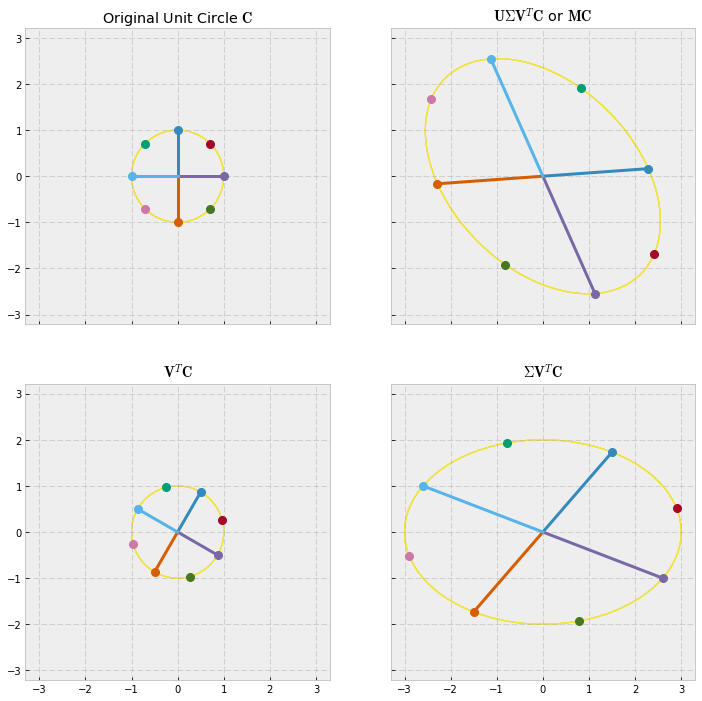

In [17]:
from matplotlib.patches import ConnectionPatch

u = np.array([1,1])

# Unit circle
u = u / np.linalg.norm(u)
C = np.c_[[0,1], [u[0],  u[1]], [1,0], [u[0], -u[1]], [0,-1], [-u[0], -u[1]], [-1,0], [-u[0],  u[1]]  ]
an  = np.linspace(0, 2 * np.pi, 100)
Ca = np.array([np.cos(an), np.sin(an)])

theta = np.pi / 4
pi = np.pi / 6
R1 = np.array([np.cos(theta), np.sin(theta), -np.sin(theta), np.cos(theta)]).reshape(2,2)
R2 = np.array([np.cos(pi),    np.sin(pi),    -np.sin(pi),    np.cos(pi)]).reshape(2,2)
S1 = np.array([3, 0, 0, 2]).reshape(2,2)
M = np.dot(np.dot(R1, S1), R2)
print("M")
print(M)

U, S, Vh = np.linalg.svd(M, full_matrices=True)
# 행과 열에 적당히 -1을 곱해도 각 열은 여전히 고유벡터이므로 뒤집어지지 않는 쪽을 선택하기 위해
# 고유벡터를 약간 조정한다. 그때 그때 적당히 숫자를 보고 조정해야함.
U[:,0] = U[:,0]*-1
Vh[0,:] = Vh[0,:]*-1
S = np.diag(S)
print("U")
print(U)
print("S")
print(S)
print("Vh")
print(Vh)

print("U*S*Vh = M")
print(np.matrix(U)*np.matrix(S)*np.matrix(Vh))

plt.rcParams["figure.figsize"] = (12, 12)
fig , ax = plt.subplots(2, 2, sharex=True, sharey=True)
line_idx = [0, 2, 4, 6]

for i in range(8):
    ax[0,0].plot(Ca[0,:], Ca[1,:], color=style_colors[8], lw=1, zorder=1)
    ax[0,0].plot(C[0,i],  C[1,i], 'o', markersize=8, color=style_colors[i])
    if i in line_idx :
        ax[0,0].plot([0, C[0,i]], [0, C[1,i]], color=style_colors[i], lw=3)
    
    ax[0,0].set_title(r"Original Unit Circle $\mathbf{C}$")

Cv = np.dot(Vh, C)   
Cav = np.dot(Vh, Ca)
for i in range(8):
    ax[1,0].plot(Cav[0,:], Cav[1,:], color=style_colors[8], lw=1, zorder=1)
    ax[1,0].plot(Cv[0,i],  Cv[1,i], 'o', markersize=8, color=style_colors[i])
    if i in line_idx :
        ax[1,0].plot([0, Cv[0,i]], [0, Cv[1,i]], color=style_colors[i], lw=3)
    ax[1,0].set_title(r"$\mathbf{V}^{T}\mathbf{C}$")

    
Csv = np.dot(S, Cv)   
Casv = np.dot(S, Cav)   
for i in range(8):
    ax[1,1].plot(Casv[0,:], Casv[1,:], color=style_colors[8], lw=1, zorder=1)
    ax[1,1].plot(Csv[0,i],  Csv[1,i], 'o', markersize=8, color=style_colors[i])
    if i in line_idx :
        ax[1,1].plot([0, Csv[0,i]], [0, Csv[1,i]], color=style_colors[i], lw=3)
    ax[1,1].set_title(r"$\mathbf{\Sigma}\mathbf{V}^{T}\mathbf{C}$")

    
Cusv = np.dot(U, Csv)  
Causv = np.dot(U, Casv)   
for i in range(8):
    ax[0,1].plot(Causv[0,:], Causv[1,:], color=style_colors[8], lw=1, zorder=1)
    ax[0,1].plot(Cusv[0,i],  Cusv[1,i], 'o', markersize=8, color=style_colors[i])
    if i in line_idx :
        ax[0,1].plot([0, Cusv[0,i]], [0, Cusv[1,i]], color=style_colors[i], lw=3)
    ax[0,1].set_title(r"$\mathbf{U}\mathbf{\Sigma}\mathbf{V}^{T}\mathbf{C}$ or $\mathbf{M}\mathbf{C}$")


plt.axis('equal')
plt.show()

## 참고문헌

1. [kreyzig:8.4] KREYZIG 공업수학:8.4 고유기저.대각화.2차형식, Erwin Kreyzig, Wiley

2. [히라오카] 프로그래머를 위한 선형대수, 히라오카 카즈유키, 호리 겐, 길벗

3. [그람-슈미트:wiki] https://ko.wikipedia.org/wiki/그람-슈미트_과정

4. [MAE 280A] Linear Systems Theor - Lecture 11, Mauricio de Oliveira, University of California San Diego, http://control.ucsd.edu/mauricio/courses/mae280a/index.html

5. [quandt] Some Basic Matrix Theorems, Richard E. Quandt, Princeton University

6. [math.stackexchange] https://math.stackexchange.com/questions/148532/general-expression-for-determinant-of-a-block-diagonal-matrix

7. [kreyzig:7.7] KREYZIG 공업수학:7.7 행렬식. Cramer의 법칙, Erwin Kreyzig, Wiley

8. [lay] Linear Algebra and Its Applications 5th ed., David C. Lay, Steven R. Lay, Judi J. McDonald, Pearson

9. [다크프로그래머] [선형대수학 #4] 특이값 분해(Singular Value Decomposition, SVD)의 활용, http://darkpgmr.tistory.com/106

10. [svd:wiki_rot] https://en.wikipedia.org/wiki/Singular-value_decomposition#Rotation,_scaling

In [13]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown){ font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: 'Nanum Gothic Coding', monospace !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: 'Nanum Gothic Coding', monospace !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>